## EDA To Prediction (DieTanic)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale=2)

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- The Age, Cabin and Embarked have null values. I will try to fix them.

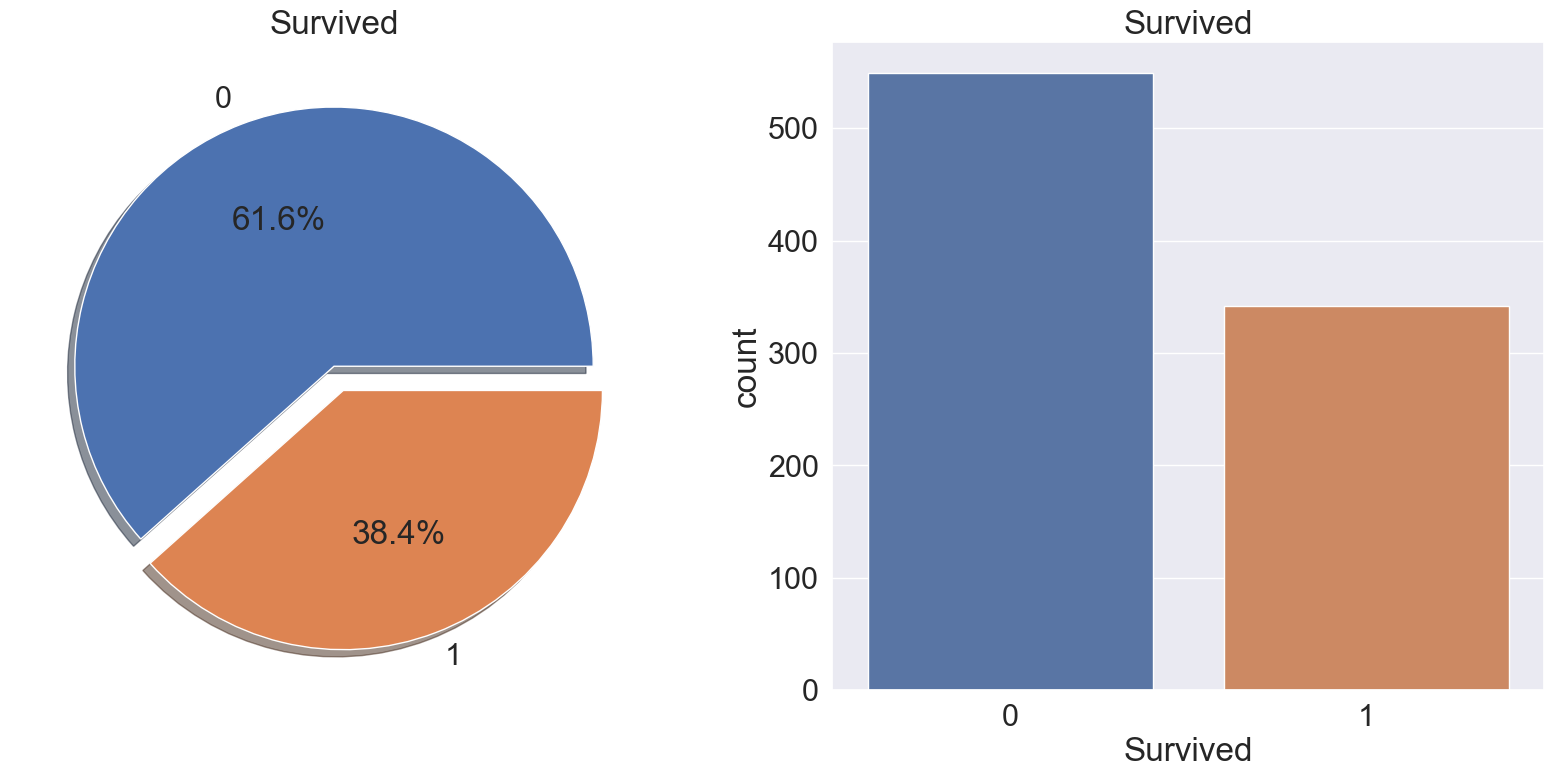

In [5]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(data=data, x='Survived', ax=ax[1])
ax[1].set_title('Survived')
plt.show()

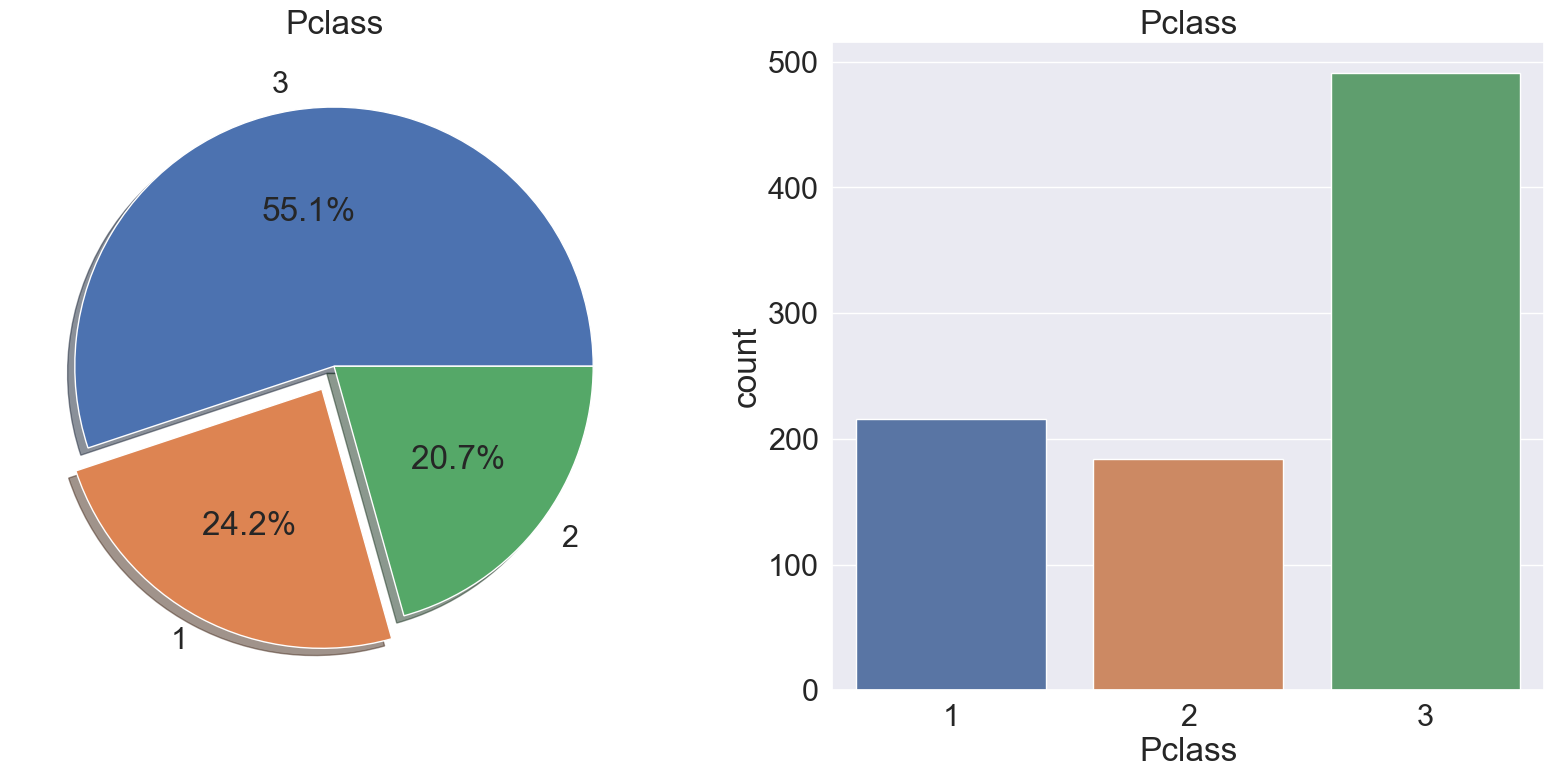

In [6]:
temp_col = 'Pclass'
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[temp_col].value_counts().plot.pie(explode=[0, 0.1, 0], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title(temp_col)
ax[0].set_ylabel('')
sns.countplot(data=data, x=temp_col, ax=ax[1])
ax[1].set_title(temp_col)
plt.show()

- it is evident that not many passengers survived the accident

- Out of 891 passengers in training set, only around 350 survived i.e, Only 38.4% of the total training set survived the crash. We need to dig down more ro get better insights from the data and see which catrgories of the pssengers did survive and who didn't.

## Sex -> Categorical Feature

In [7]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

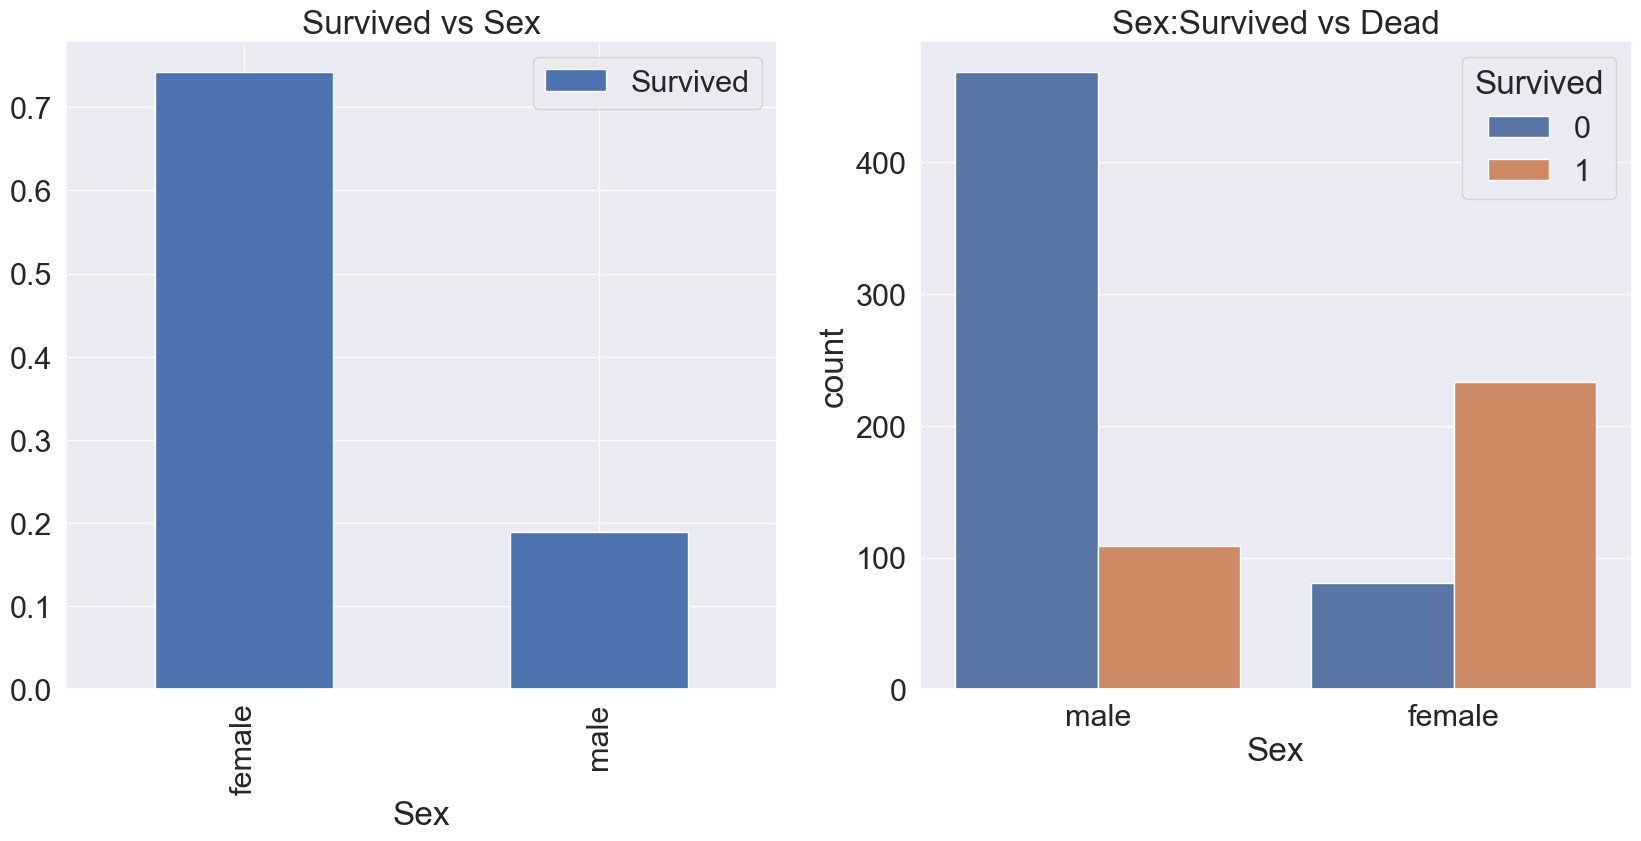

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(data=data, x='Sex', hue='Survived', ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

## Pclass -> Ordinal Feature

In [9]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


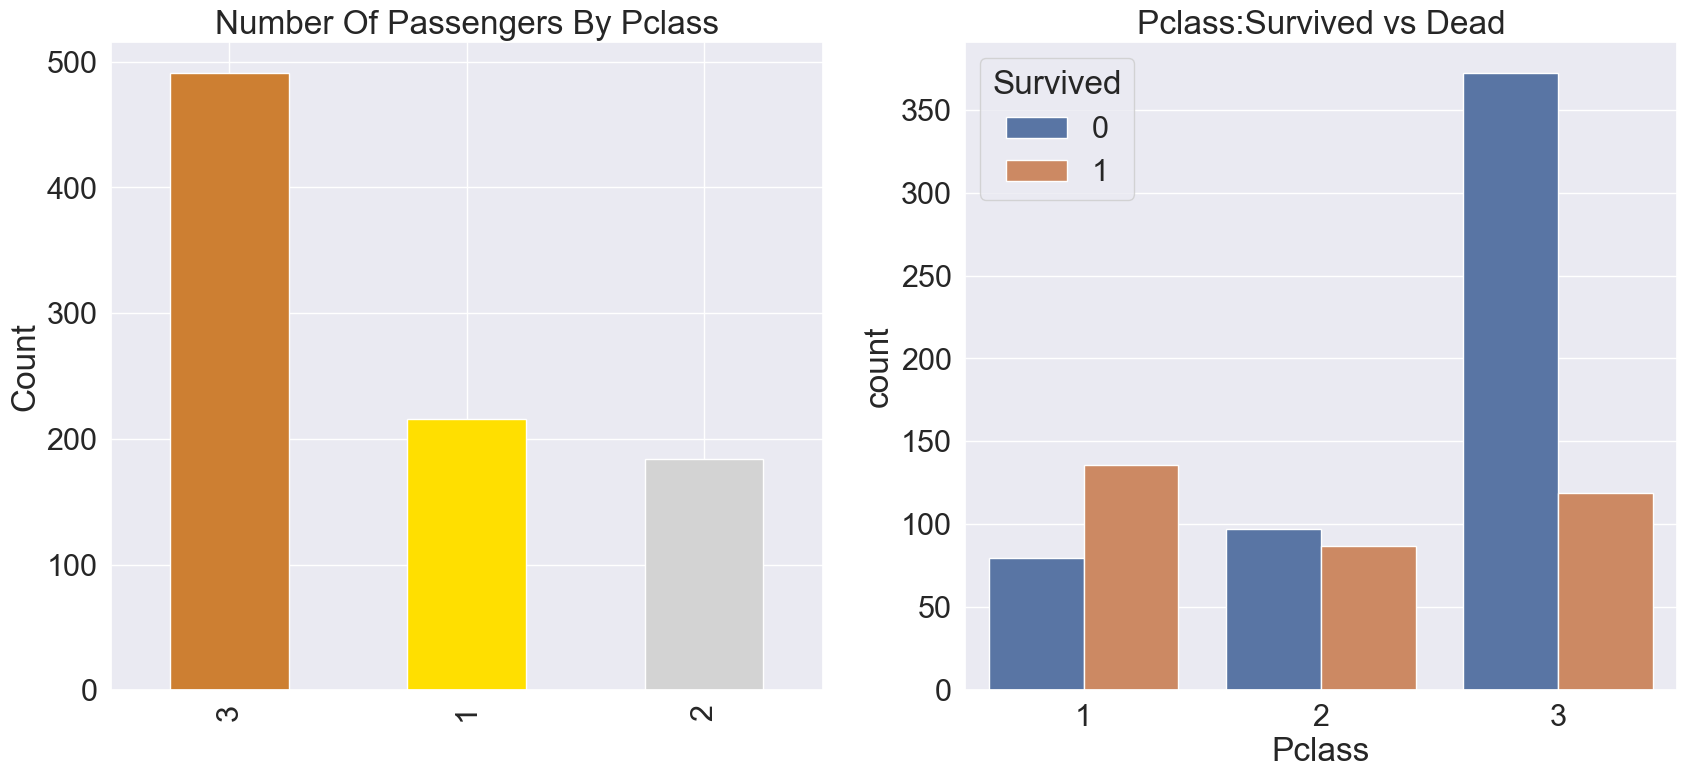

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(data=data, x='Pclass', hue='Survived', ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [11]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

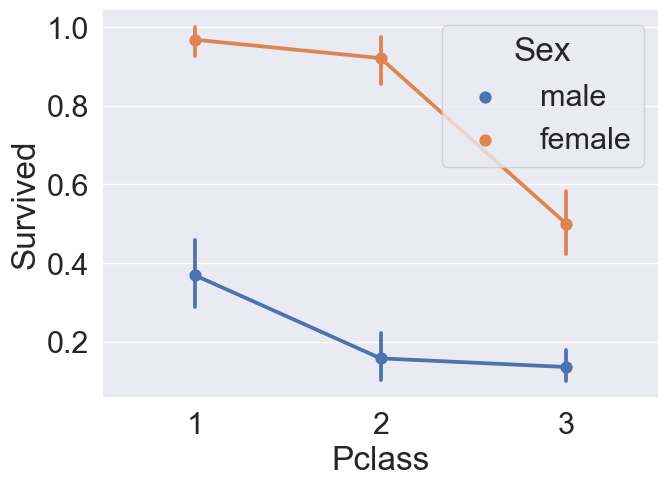

In [12]:
sns.pointplot(data=data, x='Pclass', y='Survived', hue='Sex')
plt.show()

## Age -> Continous Feature

In [13]:
print('Oldest Passenger was of:', data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age in the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age in the ship: 29.69911764705882 Years


In [14]:
data['Age'].describe() # 굳이 위에처럼 안치고 이렇게 치면 통계 나온다

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

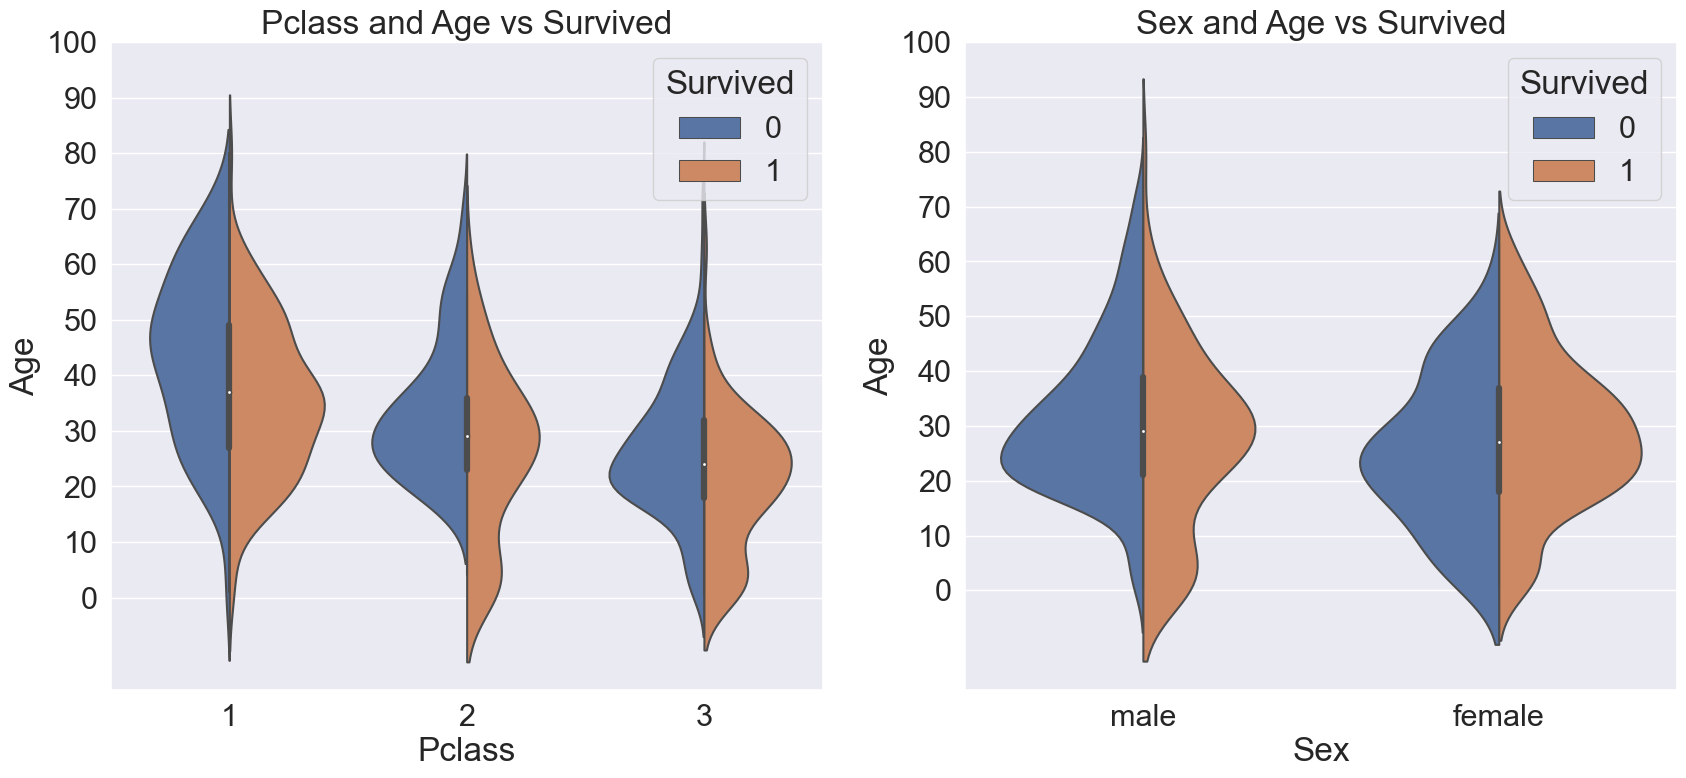

In [15]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(data=data, x='Pclass', y='Age', hue='Survived', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(data=data, x='Sex', y='Age', hue='Survived', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [16]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [17]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [18]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [19]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [20]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age'] = 46

In [21]:
data.Age.isnull().any()

False

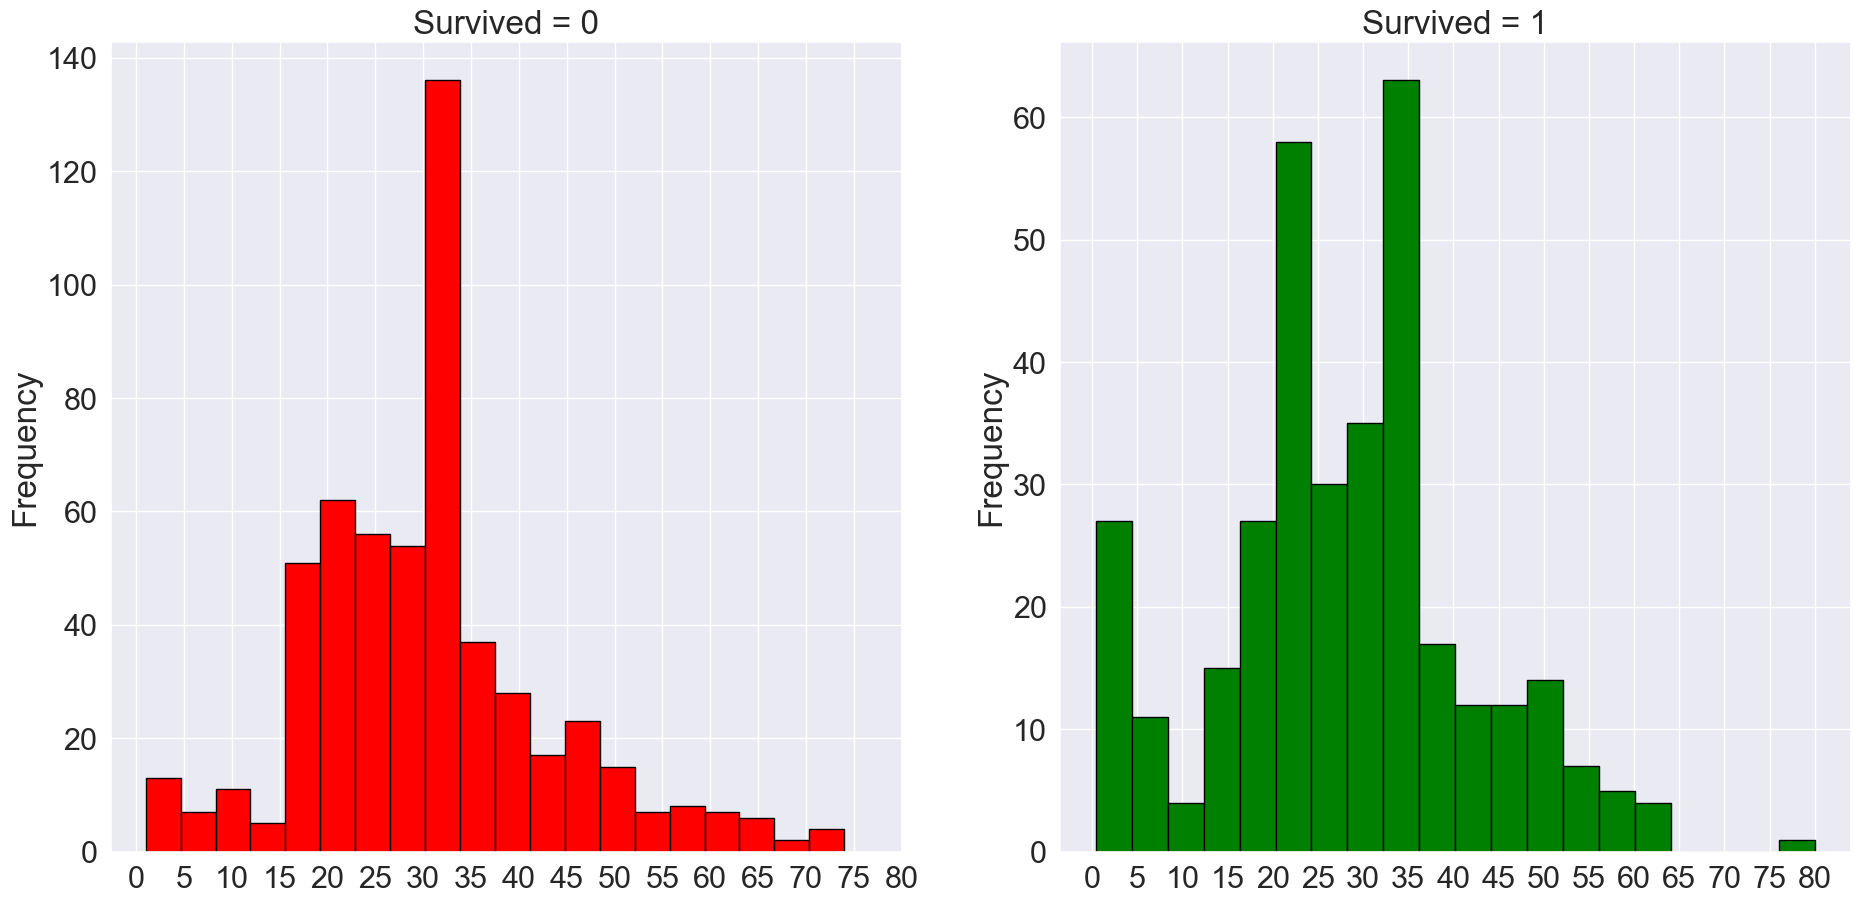

In [22]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived']== 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived']== 1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived = 1')
# x2 = list(range(0, 85, 5))
ax[1].set_xticks(x1)
plt.show()

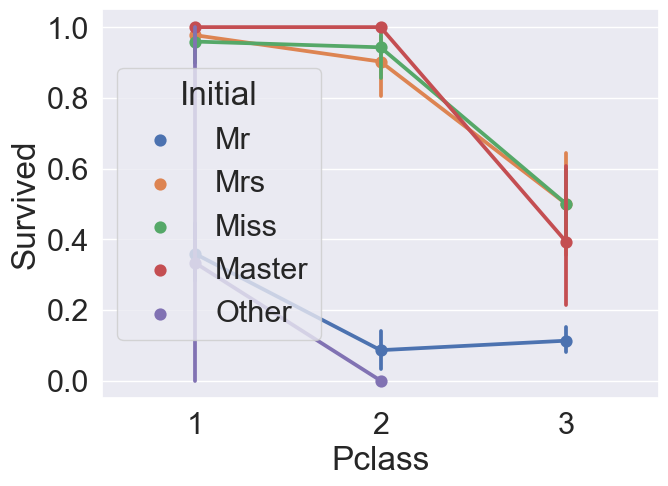

In [23]:
sns.pointplot(data=data, x='Pclass', y='Survived', hue='Initial')
plt.show()

## Embarked--> Categorical Value

In [24]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

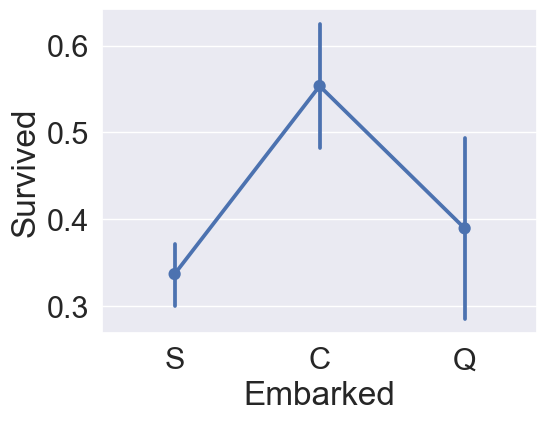

In [25]:
sns.pointplot(data=data, x='Embarked', y='Survived')
fig = plt.gcf()
fig.set_size_inches(5, 4)
plt.show()

<Axes: xlabel='Embarked', ylabel='Survived'>

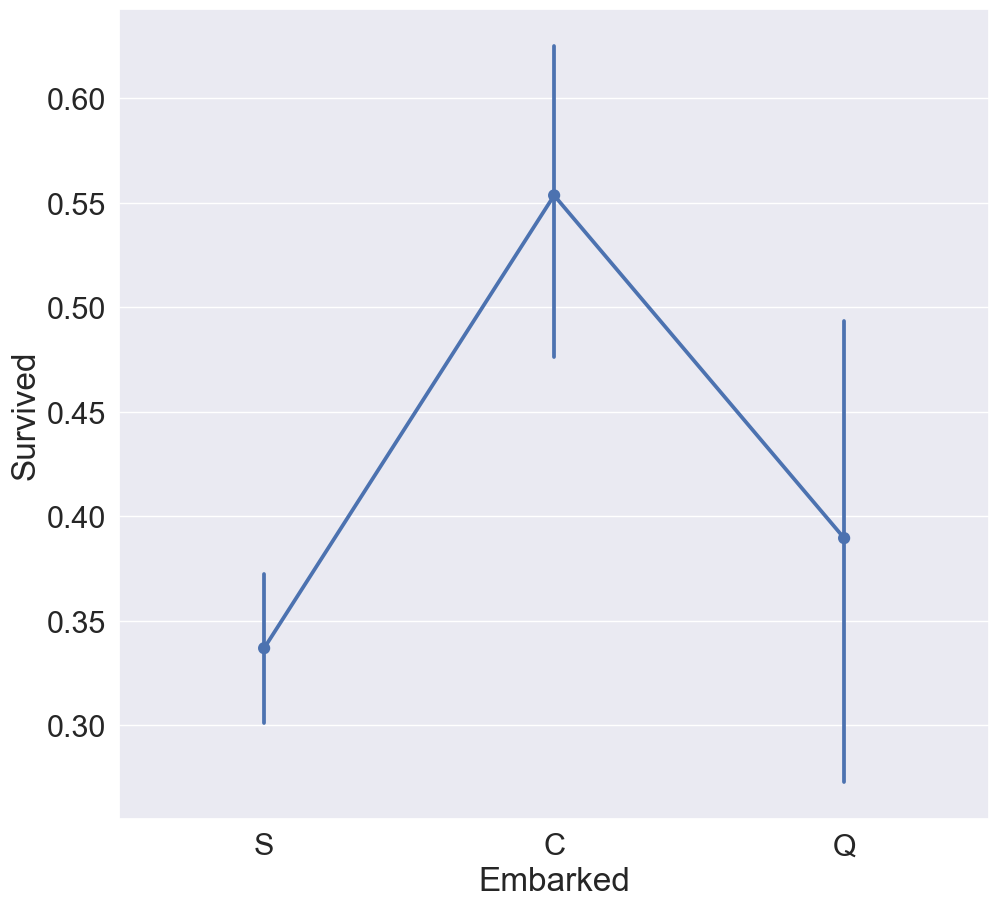

In [26]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.pointplot(data=data, x='Embarked', y='Survived', ax=ax)

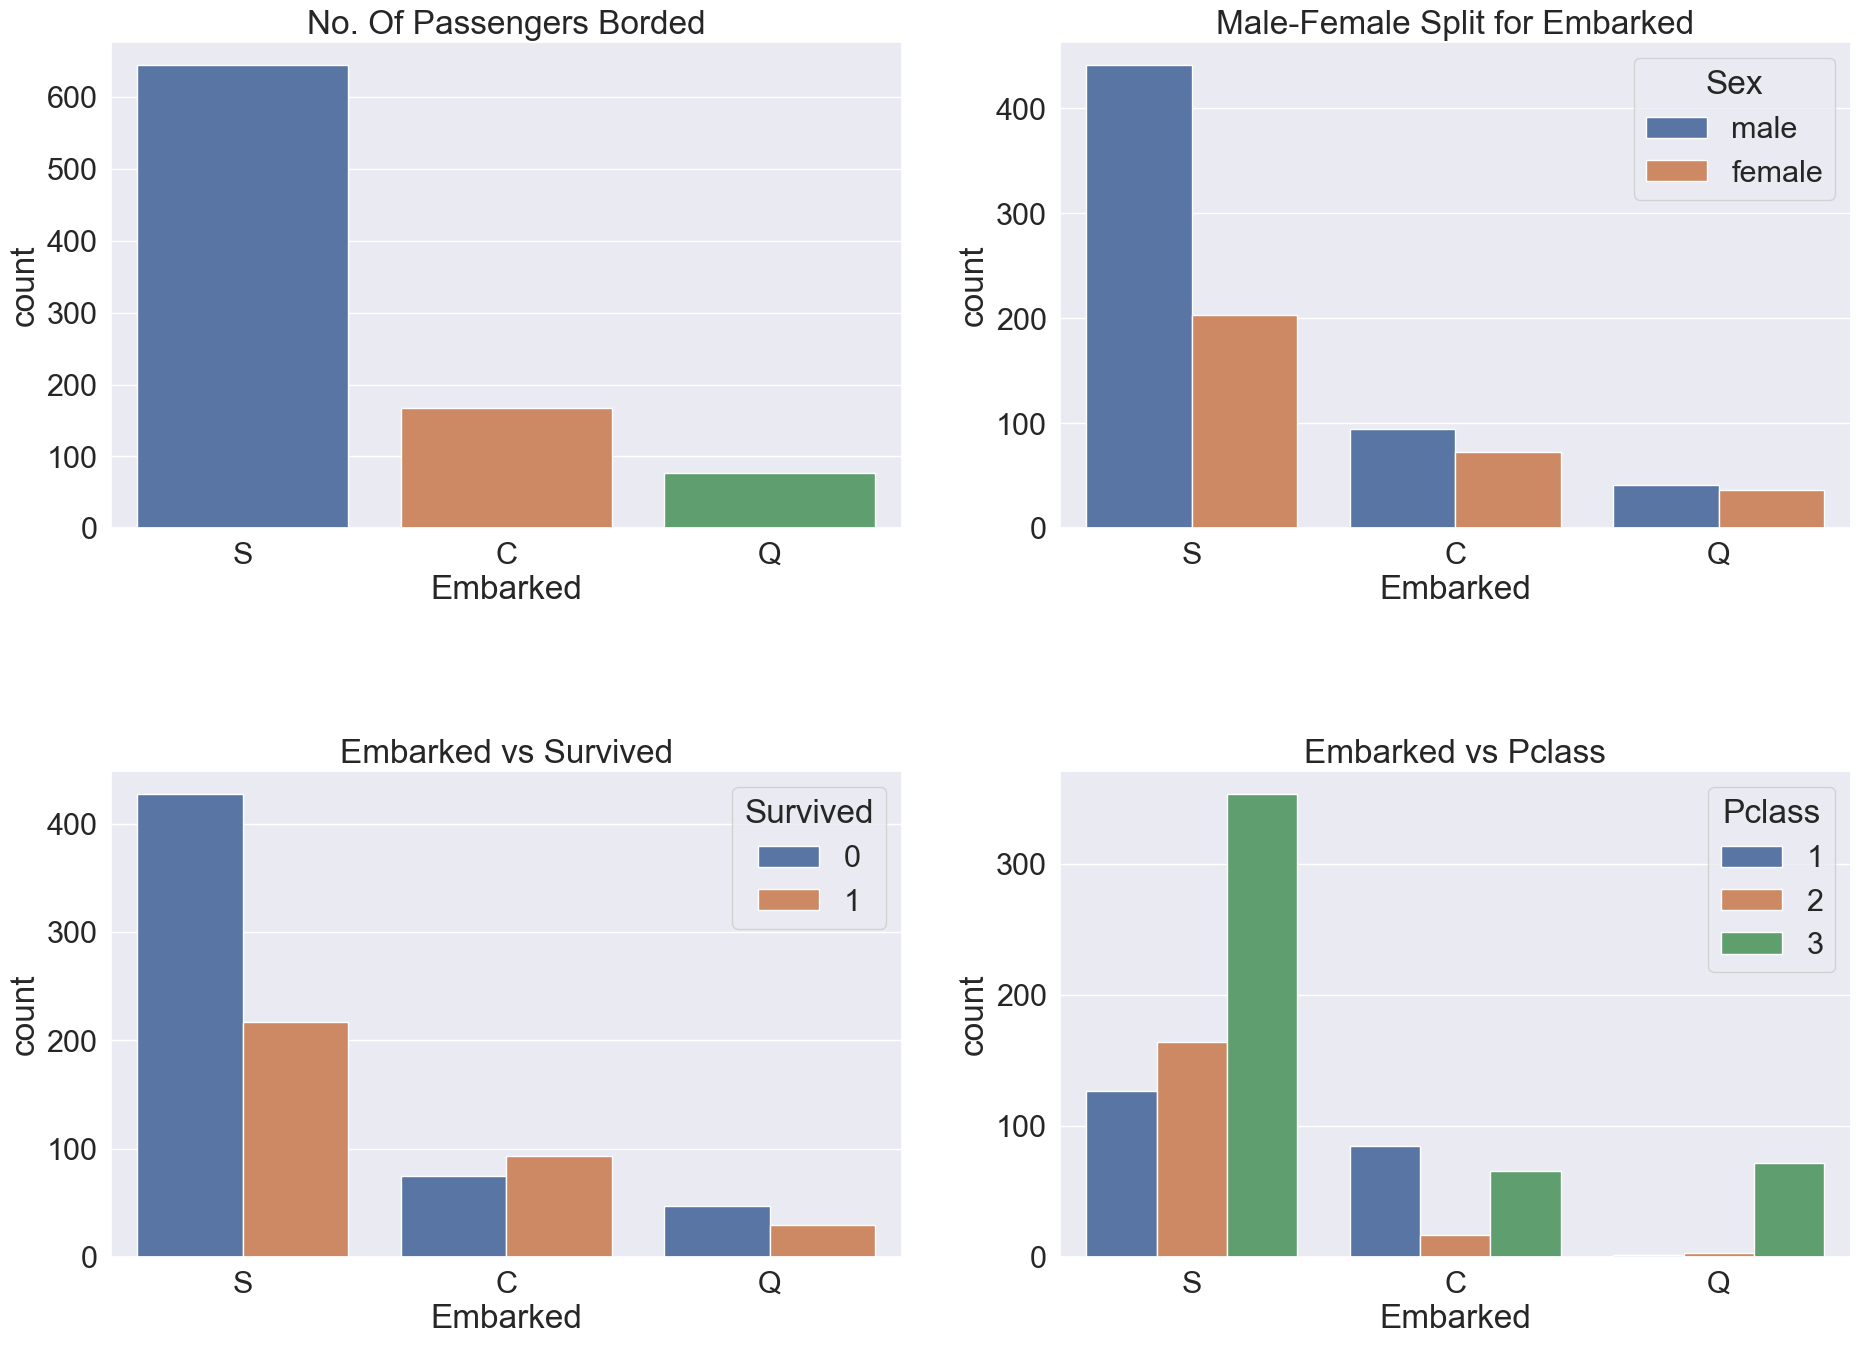

In [27]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot(data=data, x='Embarked', ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Borded')
sns.countplot(data=data, x='Embarked', hue='Sex', ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')
sns.countplot(data=data, x='Embarked', hue='Survived', ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot(data=data, x='Embarked', hue='Pclass', ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

<Axes: xlabel='Pclass', ylabel='Survived'>

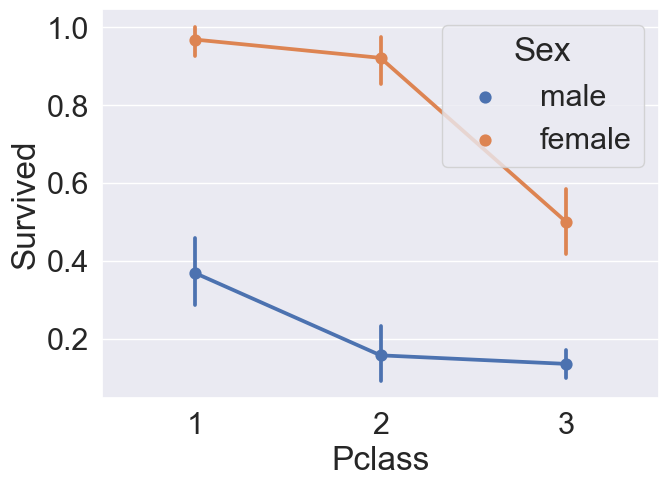

In [28]:
sns.pointplot(data=data, x='Pclass', y='Survived', hue='Sex')

<Axes: xlabel='Age', ylabel='Density'>

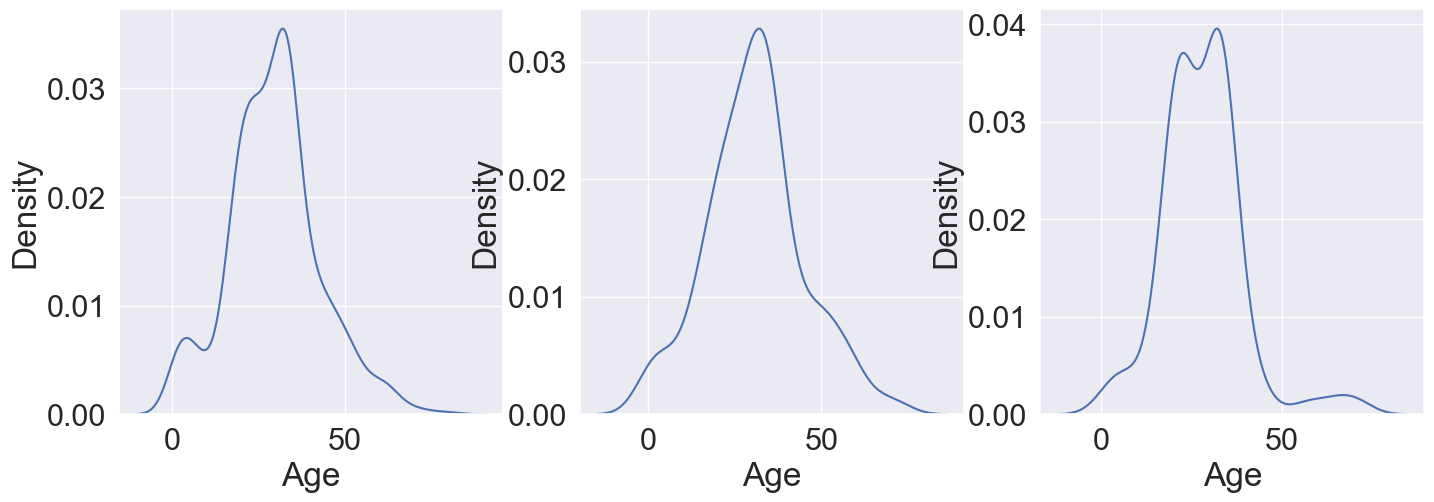

In [29]:
# 내가 그냥 해본거
f,ax = plt.subplots(1, 3, figsize=(15, 5))
sns.kdeplot(data[data['Embarked']== 'S'].Age ,ax=ax[0])
sns.kdeplot(data[data['Embarked']== 'C']['Age'],ax=ax[1])
sns.kdeplot(data[data['Embarked']== 'Q']['Age'],ax=ax[2])

In [30]:
data['Embarked'].fillna('S', inplace=True)

In [31]:
data.Embarked.isnull().any()

False

In [32]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


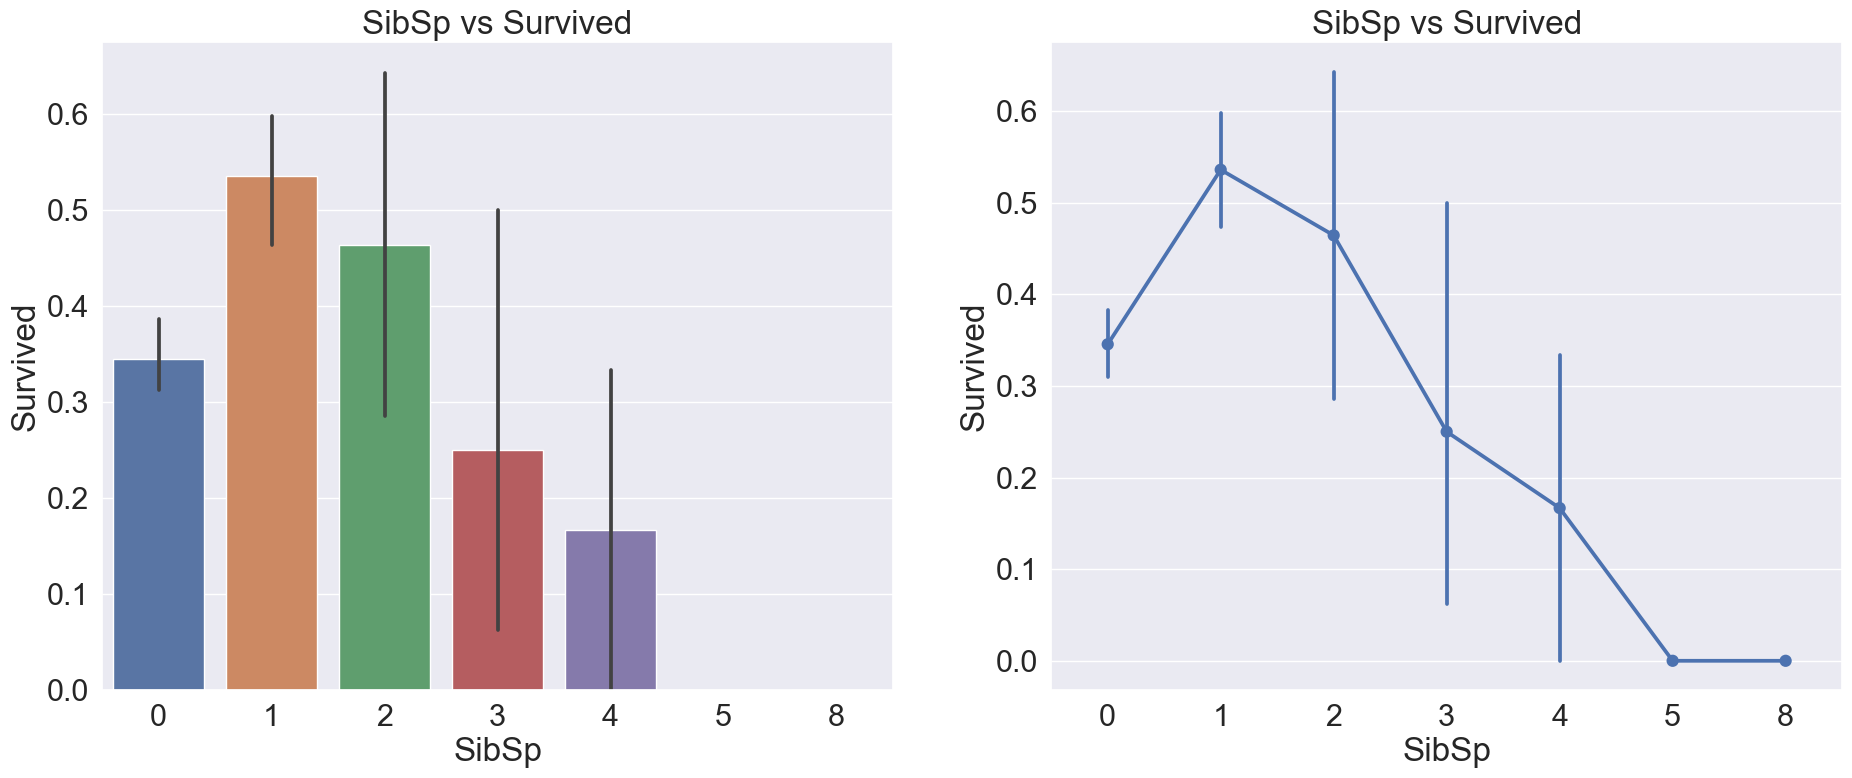

In [33]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(data=data, x='SibSp', y='Survived', ax=ax[0])
title = 'SibSp vs Survived'
ax[0].set_title(title)
sns.pointplot(data=data, x='SibSp', y='Survived', ax=ax[1])
ax[1].set_title(title)
plt.close(2)
plt.show()

In [34]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


## Parch

In [35]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


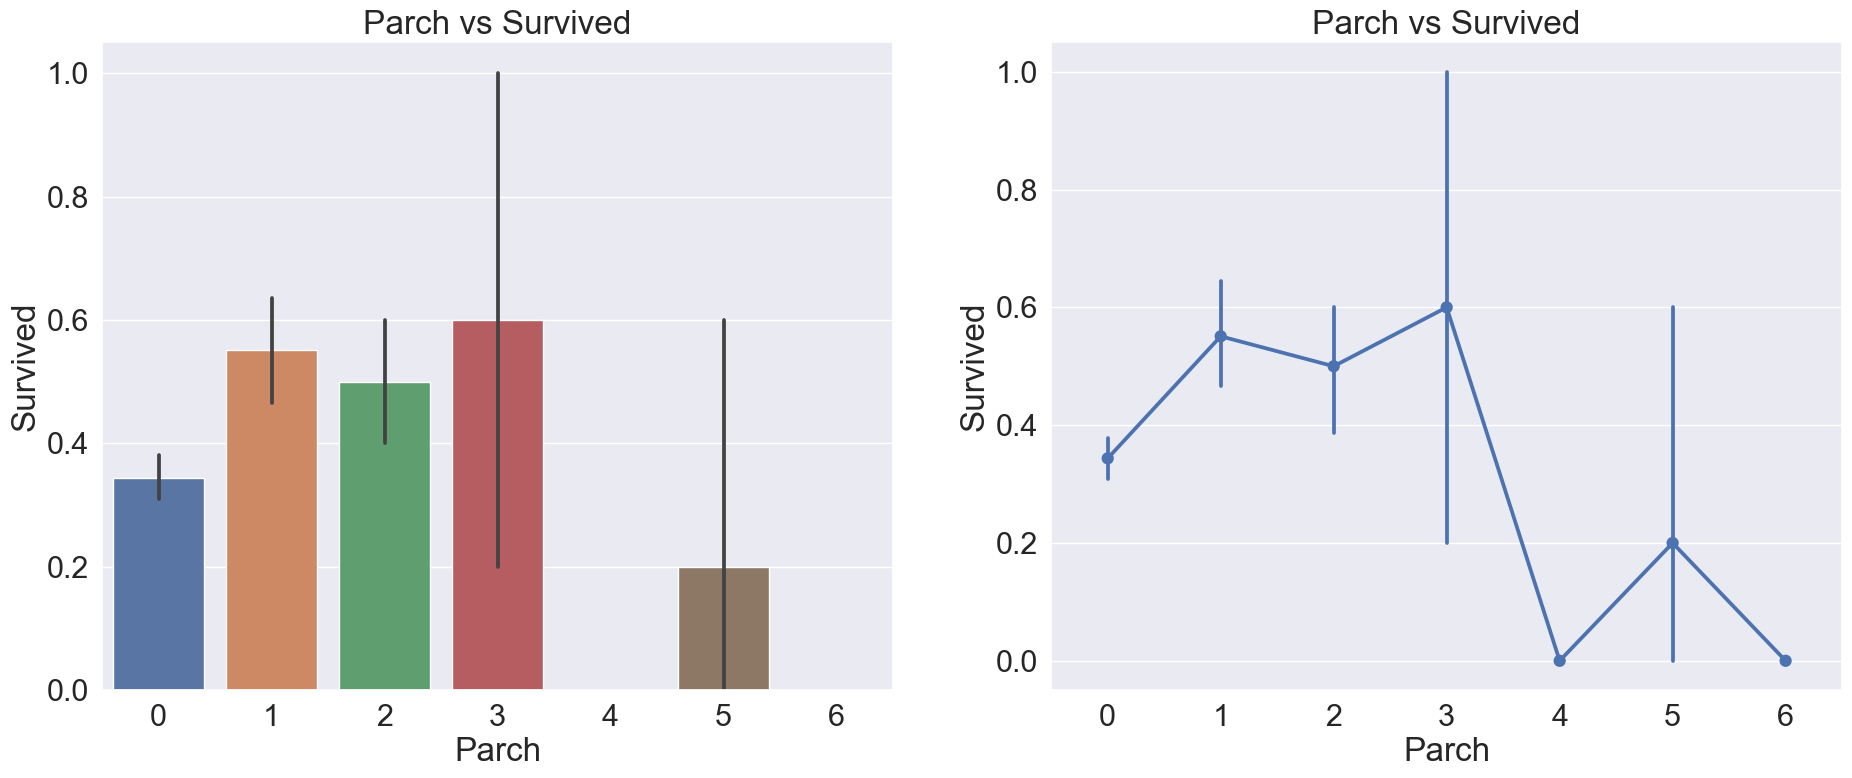

In [36]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(data=data, x='Parch', y='Survived', ax=ax[0])
title = 'Parch vs Survived'
ax[0].set_title(title)
sns.pointplot(data=data, x='Parch', y='Survived', ax=ax[1])
ax[1].set_title(title)
plt.close(2)
plt.show()

In [37]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


In [38]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

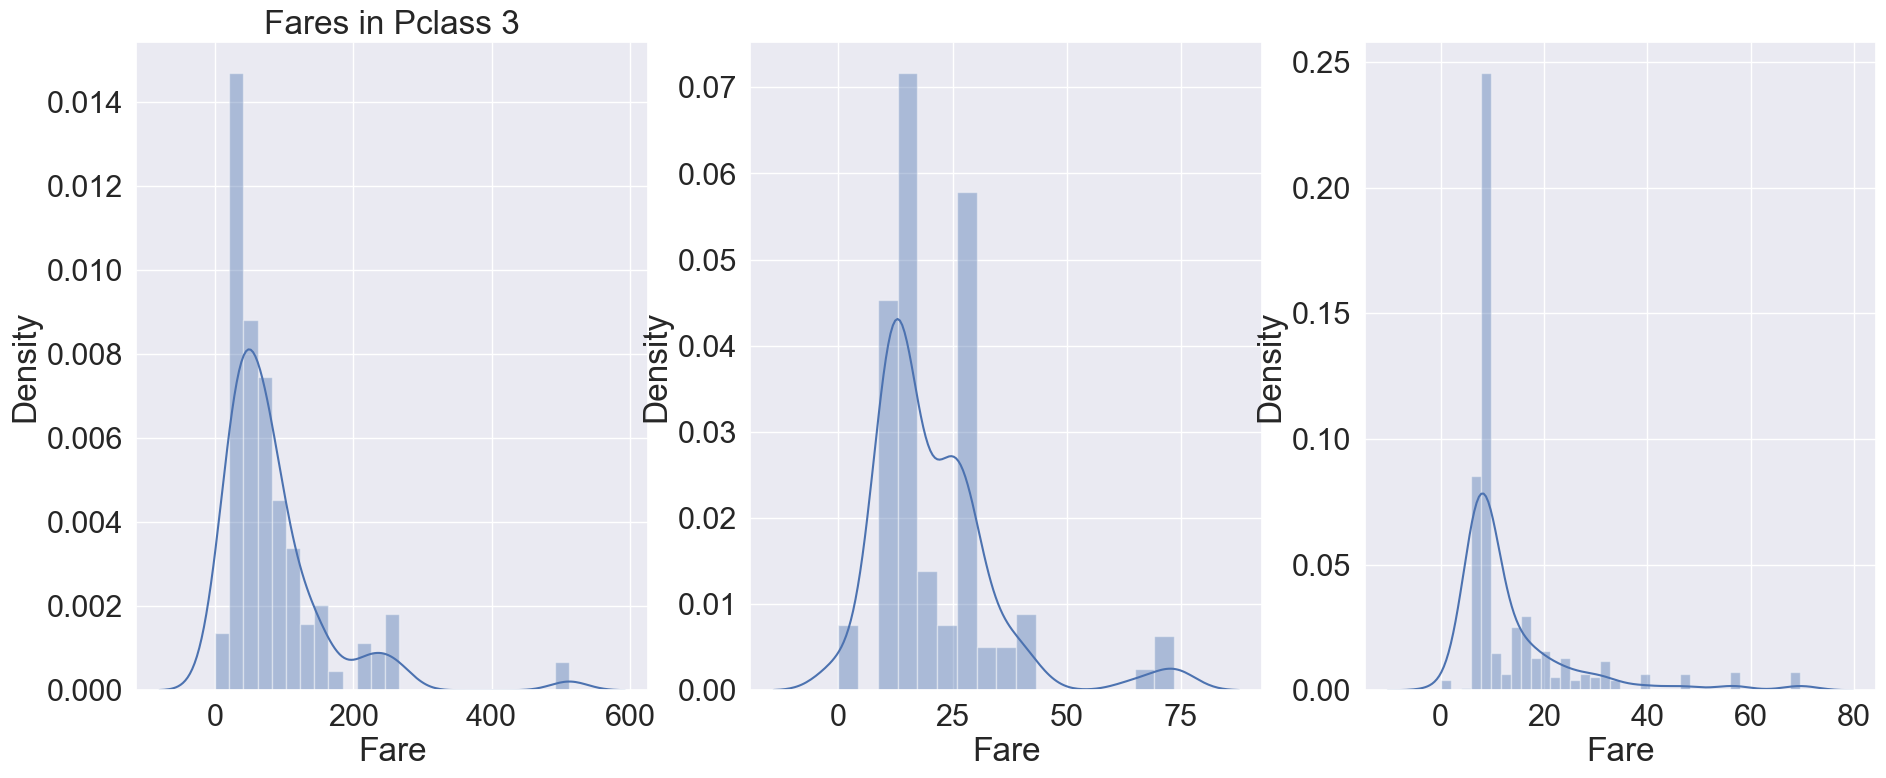

In [39]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[0].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[0].set_title('Fares in Pclass 3')
plt.show()

## Correlation Between The Features

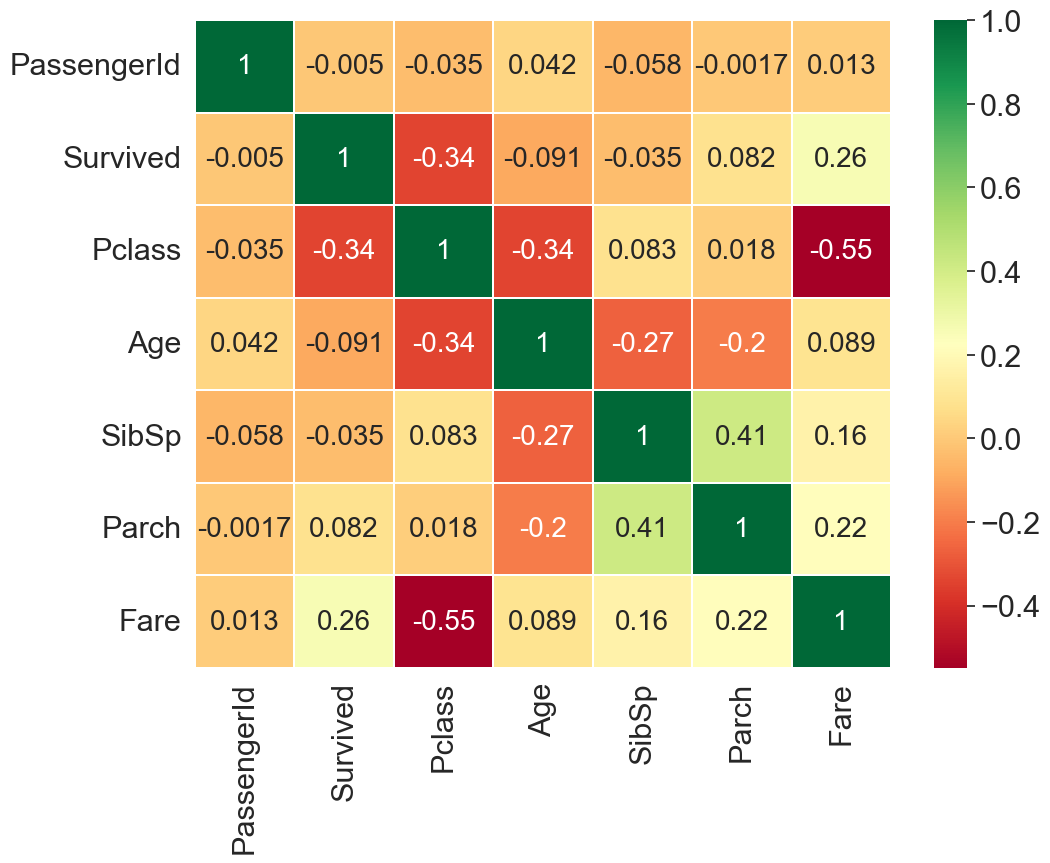

In [40]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

# Feature Engineering and Data Cleaning

## Age_band

In [41]:
data['Age_band']=0
data.loc[data['Age']<=16, 'Age_band']= 0
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age_band']= 1
data.loc[(data['Age']>32) & (data['Age']<=48), 'Age_band']= 2
data.loc[(data['Age']>48) & (data['Age']<=64), 'Age_band']= 3
data.loc[data['Age']>64, 'Age_band']= 4

In [42]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [43]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


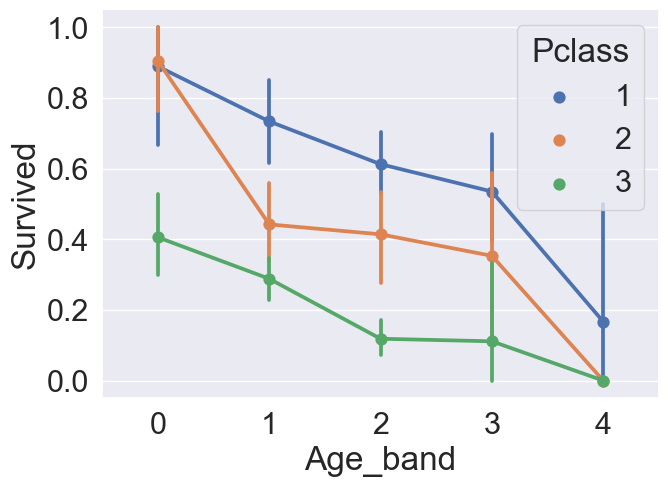

In [44]:
sns.pointplot(data=data, x='Age_band', y='Survived', hue='Pclass')
plt.show()

## Family_Size and Alone

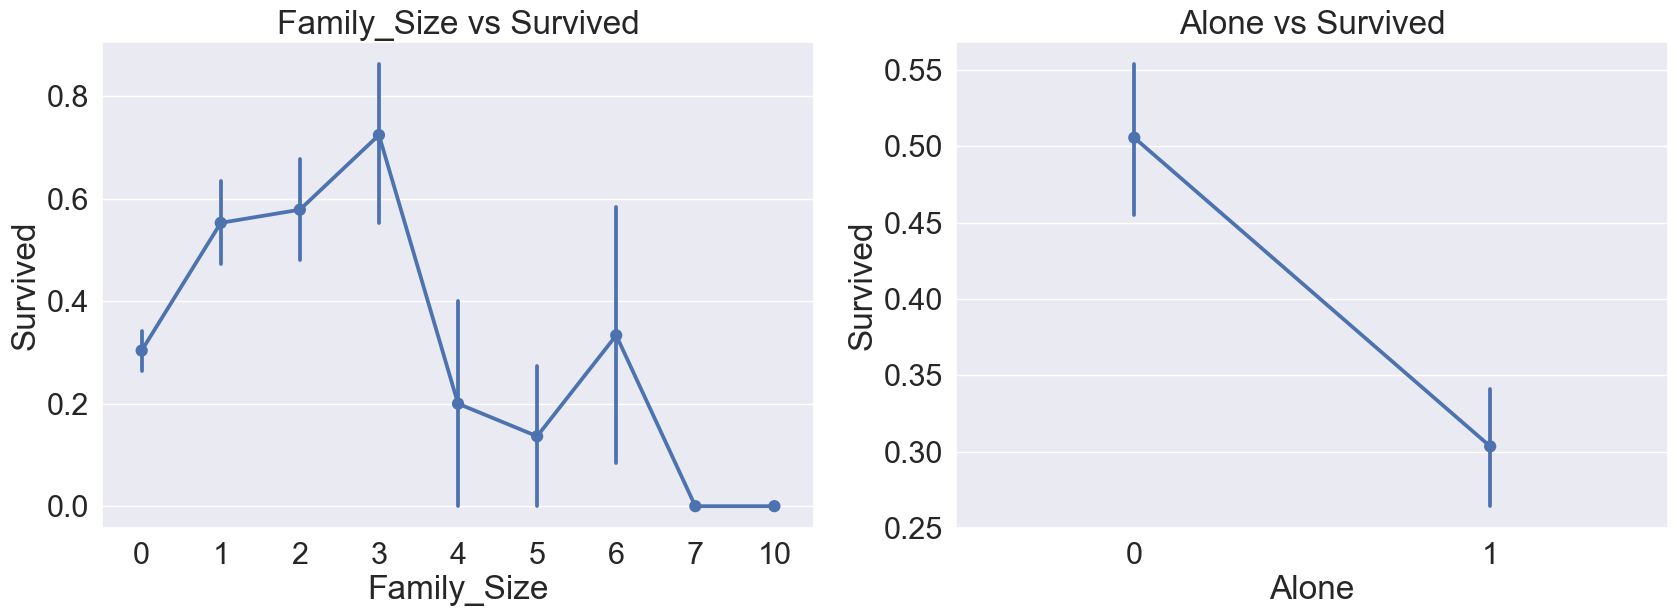

In [45]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size== 0,'Alone']= 1

f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.pointplot(data=data, x='Family_Size', y='Survived', ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(data=data, x='Alone', y='Survived', ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

In [46]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1


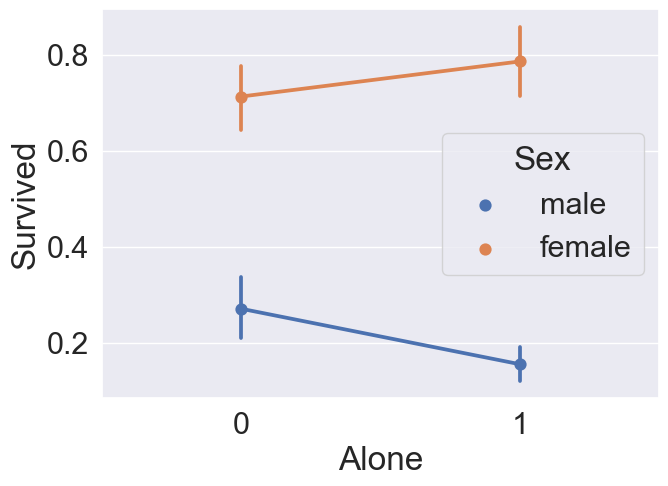

In [47]:
sns.pointplot(data=data, x='Alone', y='Survived', hue='Sex')
plt.show()

In [48]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [49]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91, 'Fare_cat']= 0
data.loc[(data['Fare']>7.91) & (data['Fare']<14.454), 'Fare_cat']= 1
data.loc[(data['Fare']>14.454) & (data['Fare']<31), 'Fare_cat']= 2
data.loc[data['Fare']>31, 'Fare_cat']= 3

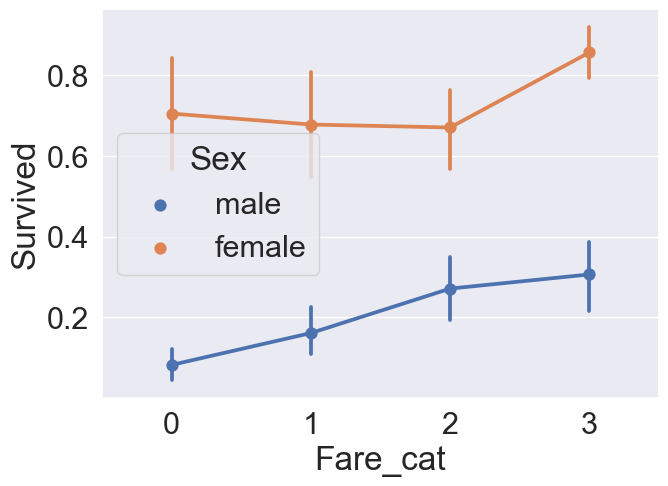

In [50]:
sns.pointplot(data=data, x='Fare_cat', y='Survived', hue='Sex')
plt.show()

## Converting String Values into Numeric

In [51]:
data['Sex'].replace(['male', 'female'],[0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'],[0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'],[0, 1, 2, 3, 4], inplace=True)

In [52]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2,0,1,"(7.91, 14.454]",1


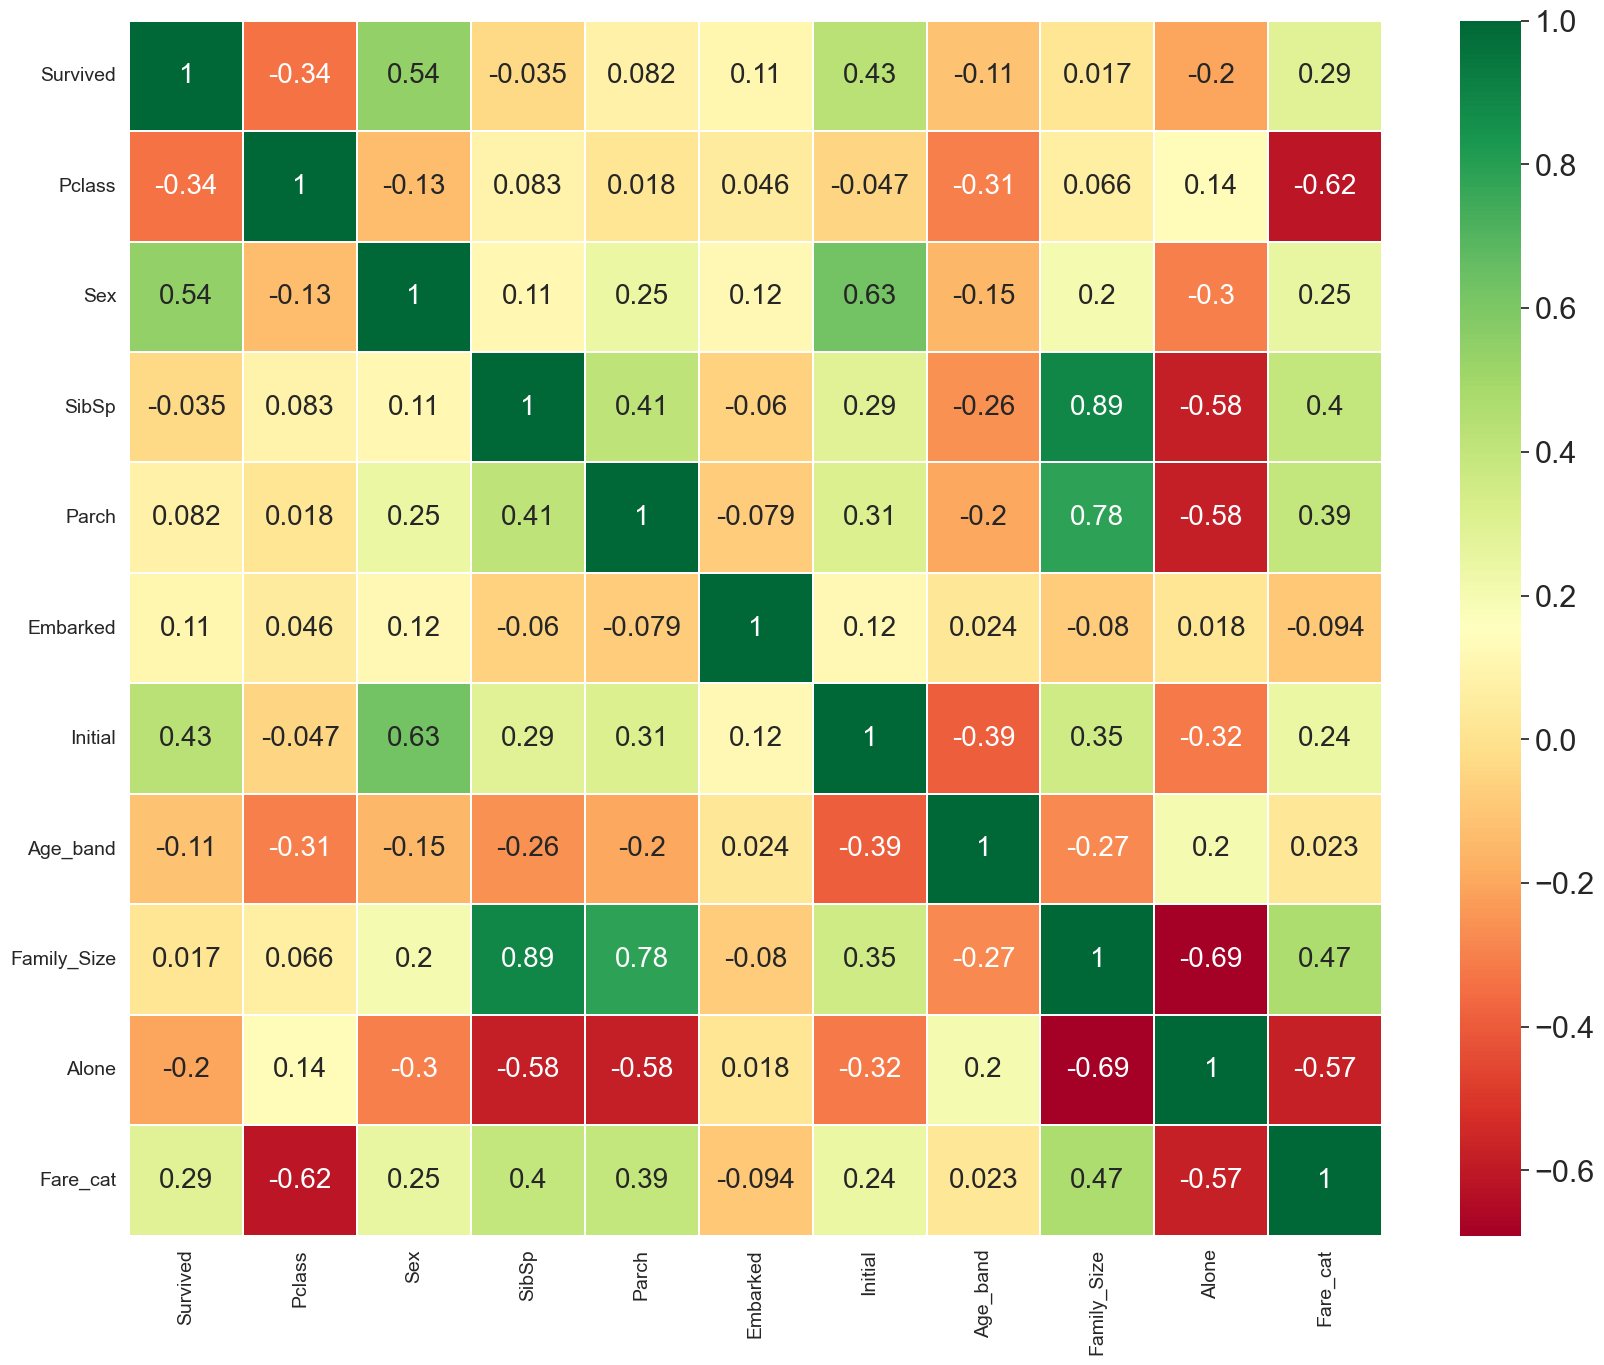

In [53]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'],axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Part3: Predictive Modeling

- Logistic Regression

- Support Vector Machines(Linear and radial)

- Random Forest

- K-Nearest Neighbours

- Naive Bayes

- Decision Tree

In [54]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

- 축구 대표팀 훈련 (traning)
- 축구 대표팀 평가전 (validation)
- 축구 대표팀 월드컵 (test)

train, valid 8:2 (0.8, 0.2)

In [55]:
train, valid = train_test_split(data, test_size=0.2, random_state=2023, stratify=data['Survived'])

<Axes: ylabel='Survived'>

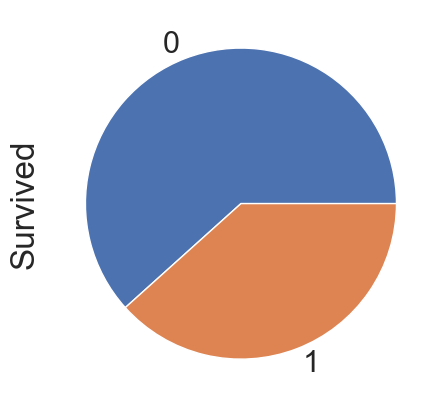

In [56]:
train['Survived'].value_counts().plot.pie()

In [57]:
train, test=train_test_split(data, test_size=0.3, random_state=1989, stratify=data['Survived'])

train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]

test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]

X=data[data.columns[1:]]
Y=data['Survived']

In [58]:
train.columns[:]

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Initial',
       'Age_band', 'Family_Size', 'Alone', 'Fare_cat'],
      dtype='object')

In [59]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1, probability=True)
model.fit(train_X, train_Y)

SVC(C=1, gamma=0.1, probability=True)

In [60]:
prediction1 = model.predict(test_X)

In [61]:
(model.predict_proba(test_X)[:, 1] > 0.5).astype(int)

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0])

In [62]:
prediction1

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0], dtype=int64)

### rbf SVM

In [63]:
score_array = []
for temp_thres in np.arange(0, 1, 0.01):
    threshold = temp_thres
    prediction1 = (model.predict_proba(test_X)[:, 1] > threshold).astype(int)
    temp_score = 100 * metrics.accuracy_score(prediction1,test_Y)
    print(temp_thres,'Accuracy for rbf SVM is {:.2f}%'.format(temp_score))
    score_array.append(temp_score)

0.0 Accuracy for rbf SVM is 38.43%
0.01 Accuracy for rbf SVM is 38.43%
0.02 Accuracy for rbf SVM is 38.43%
0.03 Accuracy for rbf SVM is 38.43%
0.04 Accuracy for rbf SVM is 38.43%
0.05 Accuracy for rbf SVM is 38.43%
0.06 Accuracy for rbf SVM is 38.43%
0.07 Accuracy for rbf SVM is 38.43%
0.08 Accuracy for rbf SVM is 38.43%
0.09 Accuracy for rbf SVM is 38.43%
0.1 Accuracy for rbf SVM is 38.43%
0.11 Accuracy for rbf SVM is 39.18%
0.12 Accuracy for rbf SVM is 40.30%
0.13 Accuracy for rbf SVM is 40.30%
0.14 Accuracy for rbf SVM is 40.30%
0.15 Accuracy for rbf SVM is 40.30%
0.16 Accuracy for rbf SVM is 47.76%
0.17 Accuracy for rbf SVM is 77.24%
0.18 Accuracy for rbf SVM is 78.73%
0.19 Accuracy for rbf SVM is 79.10%
0.2 Accuracy for rbf SVM is 79.85%
0.21 Accuracy for rbf SVM is 82.46%
0.22 Accuracy for rbf SVM is 83.21%
0.23 Accuracy for rbf SVM is 83.21%
0.24 Accuracy for rbf SVM is 83.21%
0.25 Accuracy for rbf SVM is 82.84%
0.26 Accuracy for rbf SVM is 82.84%
0.27 Accuracy for rbf SVM is 82

In [64]:
score_array = []
for temp_thres in np.arange(0, 1, 0.01):
    threshold = temp_thres
    prediction1 = (model.predict_proba(test_X)[:, 1] > threshold).astype(int)
    temp_score = 100 * metrics.accuracy_score(prediction1,test_Y)
    print(temp_thres,'Accuracy for rbf SVM is {:.2f}%'.format(temp_score))
    score_array.append(temp_score)

0.0 Accuracy for rbf SVM is 38.43%
0.01 Accuracy for rbf SVM is 38.43%
0.02 Accuracy for rbf SVM is 38.43%
0.03 Accuracy for rbf SVM is 38.43%
0.04 Accuracy for rbf SVM is 38.43%
0.05 Accuracy for rbf SVM is 38.43%
0.06 Accuracy for rbf SVM is 38.43%
0.07 Accuracy for rbf SVM is 38.43%
0.08 Accuracy for rbf SVM is 38.43%
0.09 Accuracy for rbf SVM is 38.43%
0.1 Accuracy for rbf SVM is 38.43%
0.11 Accuracy for rbf SVM is 39.18%
0.12 Accuracy for rbf SVM is 40.30%
0.13 Accuracy for rbf SVM is 40.30%
0.14 Accuracy for rbf SVM is 40.30%
0.15 Accuracy for rbf SVM is 40.30%
0.16 Accuracy for rbf SVM is 47.76%
0.17 Accuracy for rbf SVM is 77.24%
0.18 Accuracy for rbf SVM is 78.73%
0.19 Accuracy for rbf SVM is 79.10%
0.2 Accuracy for rbf SVM is 79.85%
0.21 Accuracy for rbf SVM is 82.46%
0.22 Accuracy for rbf SVM is 83.21%
0.23 Accuracy for rbf SVM is 83.21%
0.24 Accuracy for rbf SVM is 83.21%
0.25 Accuracy for rbf SVM is 82.84%
0.26 Accuracy for rbf SVM is 82.84%
0.27 Accuracy for rbf SVM is 82

Text(0, 0.5, 'accutacy score')

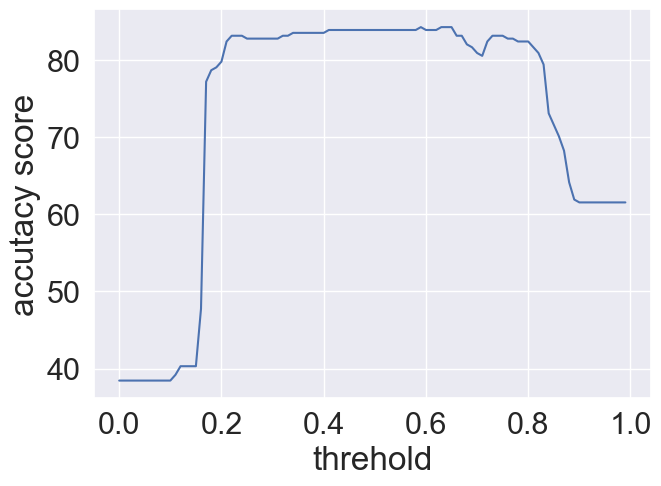

In [65]:
plt.plot(np.arange(0, 1, 0.01), score_array)
plt.xlabel('threhold')
plt.ylabel('accutacy score')

In [66]:
np.argmax(score_array)

59

### linear SVM

In [67]:
model = svm.SVC(kernel= 'linear', C=0.1, gamma=0.1, probability=True)
model.fit(train_X, train_Y)
prediction2=model.predict(test_X)
print('Accoracu for linear SVM is',metrics.accuracy_score(prediction2, test_Y))

Accoracu for linear SVM is 0.832089552238806


In [68]:
score_array = []
for temp_thres in np.arange(0, 1, 0.01):
    threshold = temp_thres
    prediction2 = (model.predict_proba(test_X)[:, 1] > threshold).astype(int)
    temp_score = 100 * metrics.accuracy_score(prediction2,test_Y)
    print(temp_thres,'Accuracy for rbf SVM is {:.2f}%'.format(temp_score))
    score_array.append(temp_score)

0.0 Accuracy for rbf SVM is 38.43%
0.01 Accuracy for rbf SVM is 38.81%
0.02 Accuracy for rbf SVM is 39.55%
0.03 Accuracy for rbf SVM is 39.55%
0.04 Accuracy for rbf SVM is 39.93%
0.05 Accuracy for rbf SVM is 40.67%
0.06 Accuracy for rbf SVM is 40.67%
0.07 Accuracy for rbf SVM is 40.67%
0.08 Accuracy for rbf SVM is 41.04%
0.09 Accuracy for rbf SVM is 41.04%
0.1 Accuracy for rbf SVM is 41.42%
0.11 Accuracy for rbf SVM is 42.16%
0.12 Accuracy for rbf SVM is 42.54%
0.13 Accuracy for rbf SVM is 49.63%
0.14 Accuracy for rbf SVM is 53.73%
0.15 Accuracy for rbf SVM is 60.07%
0.16 Accuracy for rbf SVM is 67.16%
0.17 Accuracy for rbf SVM is 67.54%
0.18 Accuracy for rbf SVM is 70.90%
0.19 Accuracy for rbf SVM is 71.64%
0.2 Accuracy for rbf SVM is 76.12%
0.21 Accuracy for rbf SVM is 76.49%
0.22 Accuracy for rbf SVM is 76.87%
0.23 Accuracy for rbf SVM is 77.99%
0.24 Accuracy for rbf SVM is 79.48%
0.25 Accuracy for rbf SVM is 79.10%
0.26 Accuracy for rbf SVM is 80.22%
0.27 Accuracy for rbf SVM is 79

Text(0, 0.5, 'accutacy score')

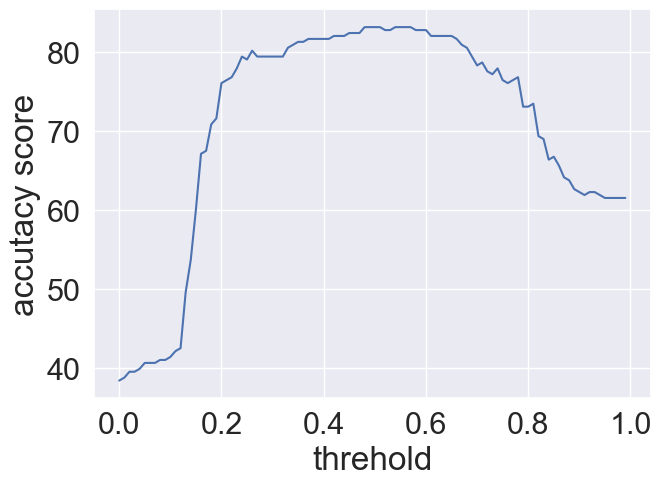

In [69]:
plt.plot(np.arange(0, 1, 0.01), score_array)
plt.xlabel('threhold')
plt.ylabel('accutacy score')

In [70]:
np.argmax(score_array)

48

### Logistic Regression

In [71]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accoracu of the Logistic Regression is',metrics.accuracy_score(prediction3, test_Y))

The accoracu of the Logistic Regression is 0.8246268656716418


In [72]:
score_array = []
for temp_thres in np.arange(0, 1, 0.01):
    threshold = temp_thres
    prediction3 = (model.predict_proba(test_X)[:, 1] > threshold).astype(int)
    temp_score = 100 * metrics.accuracy_score(prediction3,test_Y)
    print(temp_thres,'Accuracy for rbf SVM is {:.2f}%'.format(temp_score))
    score_array.append(temp_score)

0.0 Accuracy for rbf SVM is 38.43%
0.01 Accuracy for rbf SVM is 38.81%
0.02 Accuracy for rbf SVM is 39.93%
0.03 Accuracy for rbf SVM is 40.67%
0.04 Accuracy for rbf SVM is 41.04%
0.05 Accuracy for rbf SVM is 41.79%
0.06 Accuracy for rbf SVM is 45.15%
0.07 Accuracy for rbf SVM is 48.88%
0.08 Accuracy for rbf SVM is 51.87%
0.09 Accuracy for rbf SVM is 58.21%
0.1 Accuracy for rbf SVM is 59.33%
0.11 Accuracy for rbf SVM is 60.45%
0.12 Accuracy for rbf SVM is 65.30%
0.13 Accuracy for rbf SVM is 65.67%
0.14 Accuracy for rbf SVM is 68.28%
0.15 Accuracy for rbf SVM is 68.66%
0.16 Accuracy for rbf SVM is 70.15%
0.17 Accuracy for rbf SVM is 70.15%
0.18 Accuracy for rbf SVM is 70.90%
0.19 Accuracy for rbf SVM is 71.27%
0.2 Accuracy for rbf SVM is 71.64%
0.21 Accuracy for rbf SVM is 72.01%
0.22 Accuracy for rbf SVM is 72.01%
0.23 Accuracy for rbf SVM is 72.01%
0.24 Accuracy for rbf SVM is 73.88%
0.25 Accuracy for rbf SVM is 75.00%
0.26 Accuracy for rbf SVM is 75.37%
0.27 Accuracy for rbf SVM is 75

Text(0, 0.5, 'accutacy score')

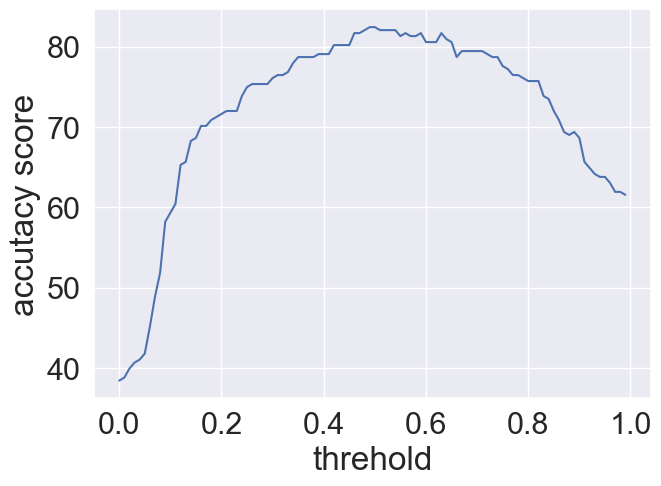

In [73]:
plt.plot(np.arange(0, 1, 0.01), score_array)
plt.xlabel('threhold')
plt.ylabel('accutacy score')

In [74]:
np.argmax(score_array)

49

### Decision Tree

In [75]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accoracu of the Decision Tree is',metrics.accuracy_score(prediction4, test_Y))

The accoracu of the Decision Tree is 0.7947761194029851


In [76]:
score_array = []
for temp_thres in np.arange(0, 1, 0.01):
    threshold = temp_thres
    prediction4 = (model.predict_proba(test_X)[:, 1] > threshold).astype(int)
    temp_score = 100 * metrics.accuracy_score(prediction4,test_Y)
    print(temp_thres,'Accuracy for rbf SVM is {:.2f}%'.format(temp_score))
    score_array.append(temp_score)

0.0 Accuracy for rbf SVM is 53.36%
0.01 Accuracy for rbf SVM is 53.36%
0.02 Accuracy for rbf SVM is 53.36%
0.03 Accuracy for rbf SVM is 53.36%
0.04 Accuracy for rbf SVM is 56.72%
0.05 Accuracy for rbf SVM is 58.58%
0.06 Accuracy for rbf SVM is 58.58%
0.07 Accuracy for rbf SVM is 58.58%
0.08 Accuracy for rbf SVM is 58.58%
0.09 Accuracy for rbf SVM is 64.93%
0.1 Accuracy for rbf SVM is 67.91%
0.11 Accuracy for rbf SVM is 67.91%
0.12 Accuracy for rbf SVM is 67.91%
0.13 Accuracy for rbf SVM is 67.91%
0.14 Accuracy for rbf SVM is 70.52%
0.15 Accuracy for rbf SVM is 71.64%
0.16 Accuracy for rbf SVM is 71.64%
0.17 Accuracy for rbf SVM is 72.39%
0.18 Accuracy for rbf SVM is 72.39%
0.19 Accuracy for rbf SVM is 72.39%
0.2 Accuracy for rbf SVM is 73.13%
0.21 Accuracy for rbf SVM is 73.13%
0.22 Accuracy for rbf SVM is 73.13%
0.23 Accuracy for rbf SVM is 77.61%
0.24 Accuracy for rbf SVM is 77.61%
0.25 Accuracy for rbf SVM is 77.99%
0.26 Accuracy for rbf SVM is 77.99%
0.27 Accuracy for rbf SVM is 77

Text(0, 0.5, 'accutacy score')

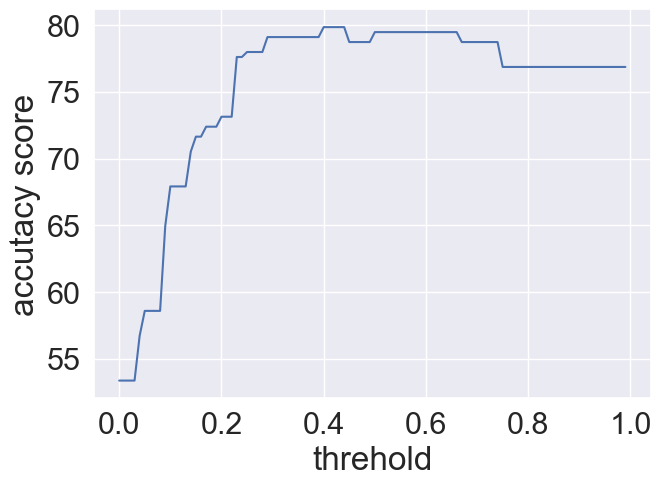

In [77]:
plt.plot(np.arange(0, 1, 0.01), score_array)
plt.xlabel('threhold')
plt.ylabel('accutacy score')

### K-Nearest Neighbors(KNN)

In [78]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accoracu of the Decision Tree is',metrics.accuracy_score(prediction5, test_Y))

The accoracu of the Decision Tree is 0.8097014925373134


In [79]:
score_array = []
for temp_thres in np.arange(0, 1, 0.01):
    threshold = temp_thres
    prediction5 = (model.predict_proba(test_X)[:, 1] > threshold).astype(int)
    temp_score = 100 * metrics.accuracy_score(prediction5,test_Y)
    print(temp_thres,'Accuracy for rbf SVM is {:.2f}%'.format(temp_score))
    score_array.append(temp_score)

0.0 Accuracy for rbf SVM is 62.31%
0.01 Accuracy for rbf SVM is 62.31%
0.02 Accuracy for rbf SVM is 62.31%
0.03 Accuracy for rbf SVM is 62.31%
0.04 Accuracy for rbf SVM is 62.31%
0.05 Accuracy for rbf SVM is 62.31%
0.06 Accuracy for rbf SVM is 62.31%
0.07 Accuracy for rbf SVM is 62.31%
0.08 Accuracy for rbf SVM is 62.31%
0.09 Accuracy for rbf SVM is 62.31%
0.1 Accuracy for rbf SVM is 62.31%
0.11 Accuracy for rbf SVM is 62.31%
0.12 Accuracy for rbf SVM is 62.31%
0.13 Accuracy for rbf SVM is 62.31%
0.14 Accuracy for rbf SVM is 62.31%
0.15 Accuracy for rbf SVM is 62.31%
0.16 Accuracy for rbf SVM is 62.31%
0.17 Accuracy for rbf SVM is 62.31%
0.18 Accuracy for rbf SVM is 62.31%
0.19 Accuracy for rbf SVM is 62.31%
0.2 Accuracy for rbf SVM is 79.10%
0.21 Accuracy for rbf SVM is 79.10%
0.22 Accuracy for rbf SVM is 79.10%
0.23 Accuracy for rbf SVM is 79.10%
0.24 Accuracy for rbf SVM is 79.10%
0.25 Accuracy for rbf SVM is 79.10%
0.26 Accuracy for rbf SVM is 79.10%
0.27 Accuracy for rbf SVM is 79

Text(0, 0.5, 'accutacy score')

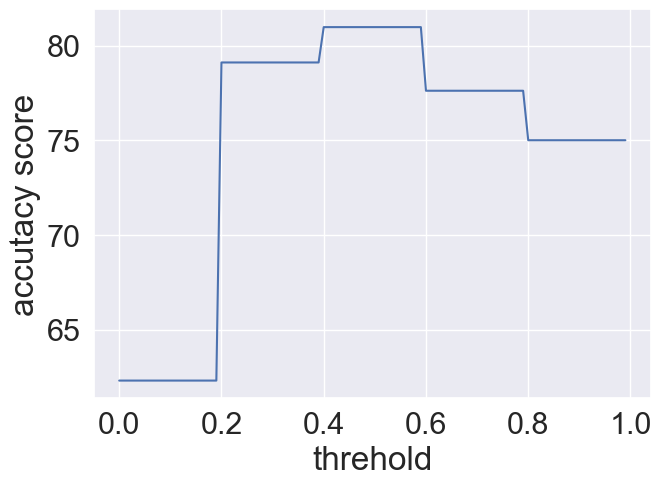

In [80]:
plt.plot(np.arange(0, 1, 0.01), score_array)
plt.xlabel('threhold')
plt.ylabel('accutacy score')

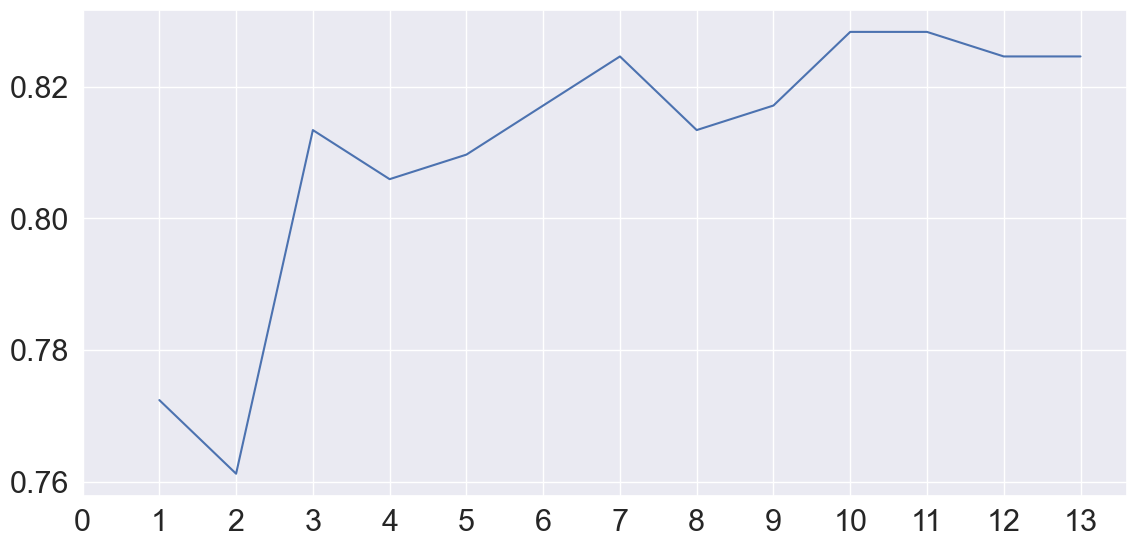

Accuracies for diffrerent values of n are: [0.77238806 0.76119403 0.81343284 0.80597015 0.80970149 0.81716418
 0.82462687 0.81343284 0.81716418 0.82835821 0.82835821 0.82462687
 0.82462687] with the max value as  0.8283582089552238


In [81]:
a_index = list(range(1, 14))

a = pd.Series()

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

for i in list(range(1, 14)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    
    a = a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
    
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

print('Accuracies for diffrerent values of n are:', a.values, 'with the max value as ', a.values.max())

### Gaussian Naive Bayes

In [82]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is' ,metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is 0.7985074626865671


In [83]:
score_array = []
for temp_thres in np.arange(0, 1, 0.01):
    threshold = temp_thres
    prediction6 = (model.predict_proba(test_X)[:, 1] > threshold).astype(int)
    temp_score = 100 * metrics.accuracy_score(prediction6,test_Y)
    print(temp_thres,'The accuracy of the NaiveBayes is {:.2f}%'.format(temp_score))
    score_array.append(temp_score)

0.0 The accuracy of the NaiveBayes is 38.43%
0.01 The accuracy of the NaiveBayes is 42.91%
0.02 The accuracy of the NaiveBayes is 55.97%
0.03 The accuracy of the NaiveBayes is 60.82%
0.04 The accuracy of the NaiveBayes is 66.04%
0.05 The accuracy of the NaiveBayes is 68.28%
0.06 The accuracy of the NaiveBayes is 69.78%
0.07 The accuracy of the NaiveBayes is 72.01%
0.08 The accuracy of the NaiveBayes is 71.64%
0.09 The accuracy of the NaiveBayes is 71.64%
0.1 The accuracy of the NaiveBayes is 73.51%
0.11 The accuracy of the NaiveBayes is 74.25%
0.12 The accuracy of the NaiveBayes is 74.25%
0.13 The accuracy of the NaiveBayes is 75.37%
0.14 The accuracy of the NaiveBayes is 75.37%
0.15 The accuracy of the NaiveBayes is 75.37%
0.16 The accuracy of the NaiveBayes is 75.37%
0.17 The accuracy of the NaiveBayes is 76.12%
0.18 The accuracy of the NaiveBayes is 76.12%
0.19 The accuracy of the NaiveBayes is 76.12%
0.2 The accuracy of the NaiveBayes is 76.12%
0.21 The accuracy of the NaiveBayes i

Text(0, 0.5, 'accutacy score')

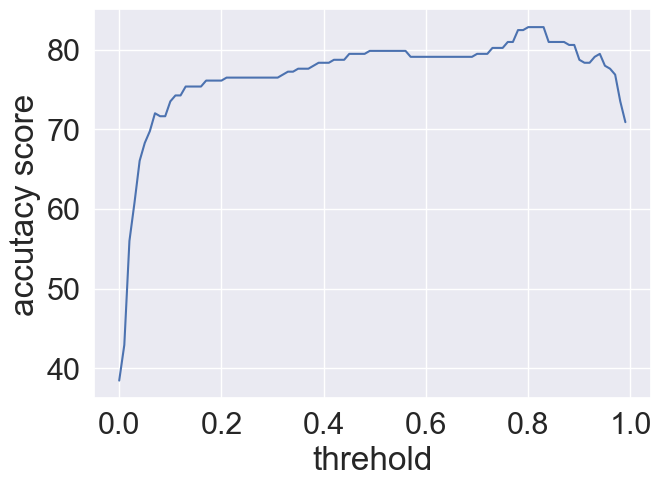

In [84]:
plt.plot(np.arange(0, 1, 0.01), score_array)
plt.xlabel('threhold')
plt.ylabel('accutacy score')

### Random Forests

In [85]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the Random Forests is' ,metrics.accuracy_score(prediction6, test_Y))

The accuracy of the Random Forests is 0.7873134328358209


In [86]:
score_array = []
for temp_thres in np.arange(0, 1, 0.01):
    threshold = temp_thres
    prediction7 = (model.predict_proba(test_X)[:, 1] > threshold).astype(int)
    temp_score = 100 * metrics.accuracy_score(prediction7,test_Y)
    print(temp_thres,'The accuracy of the NaiveBayes is {:.2f}%'.format(temp_score))
    score_array.append(temp_score)

0.0 The accuracy of the NaiveBayes is 40.67%
0.01 The accuracy of the NaiveBayes is 42.91%
0.02 The accuracy of the NaiveBayes is 43.66%
0.03 The accuracy of the NaiveBayes is 44.78%
0.04 The accuracy of the NaiveBayes is 49.63%
0.05 The accuracy of the NaiveBayes is 50.75%
0.06 The accuracy of the NaiveBayes is 52.99%
0.07 The accuracy of the NaiveBayes is 54.10%
0.08 The accuracy of the NaiveBayes is 54.48%
0.09 The accuracy of the NaiveBayes is 54.48%
0.1 The accuracy of the NaiveBayes is 65.67%
0.11 The accuracy of the NaiveBayes is 66.79%
0.12 The accuracy of the NaiveBayes is 66.79%
0.13 The accuracy of the NaiveBayes is 70.90%
0.14 The accuracy of the NaiveBayes is 70.90%
0.15 The accuracy of the NaiveBayes is 71.27%
0.16 The accuracy of the NaiveBayes is 71.64%
0.17 The accuracy of the NaiveBayes is 71.64%
0.18 The accuracy of the NaiveBayes is 71.64%
0.19 The accuracy of the NaiveBayes is 72.39%
0.2 The accuracy of the NaiveBayes is 72.39%
0.21 The accuracy of the NaiveBayes i

Text(0, 0.5, 'accutacy score')

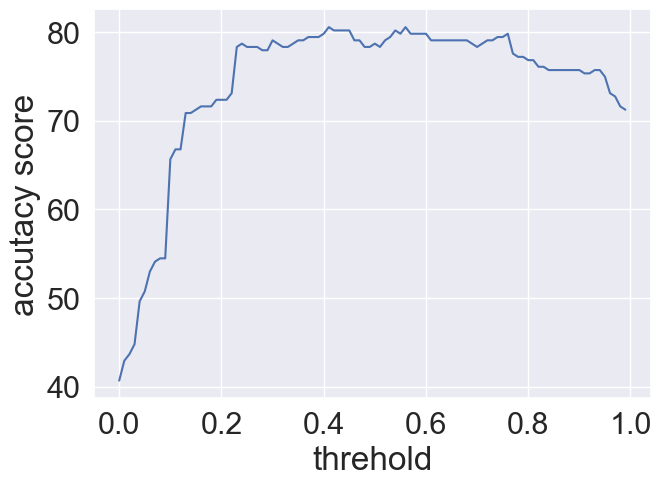

In [87]:
plt.plot(np.arange(0, 1, 0.01), score_array)
plt.xlabel('threhold')
plt.ylabel('accutacy score')

## Cross Validation

In [88]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits=10, random_state=22, shuffle=True)
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9),
         DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring = 'accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.785730,0.059693
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.818252,0.050100
Decision Tree,0.810362,0.046810
Naive Bayes,0.795843,0.054861
Random Forest,0.820474,0.047969


<Axes: >

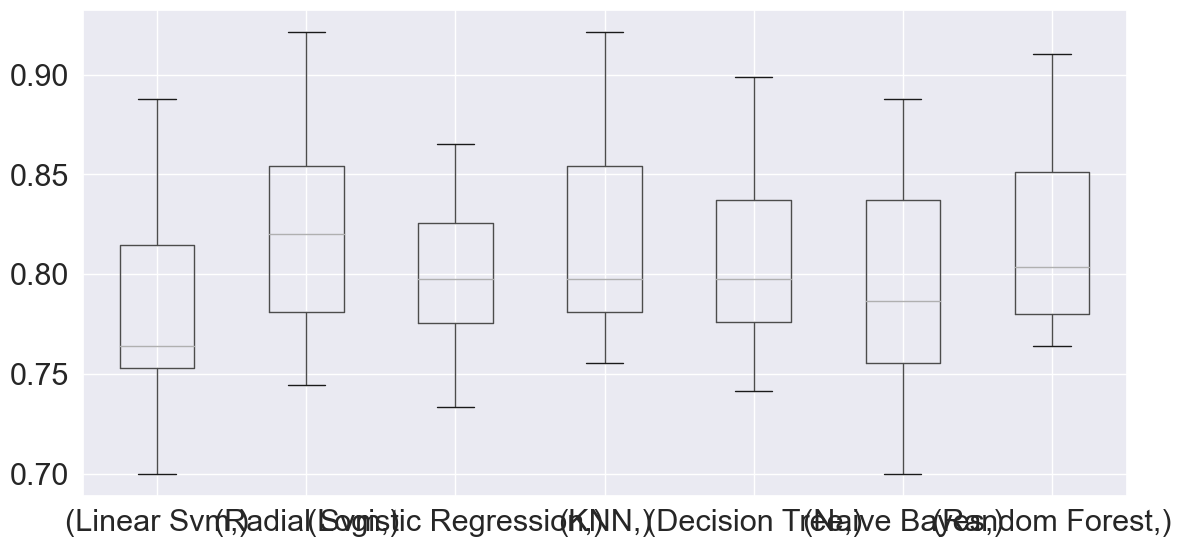

In [89]:
plt.subplots(figsize=(12, 6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

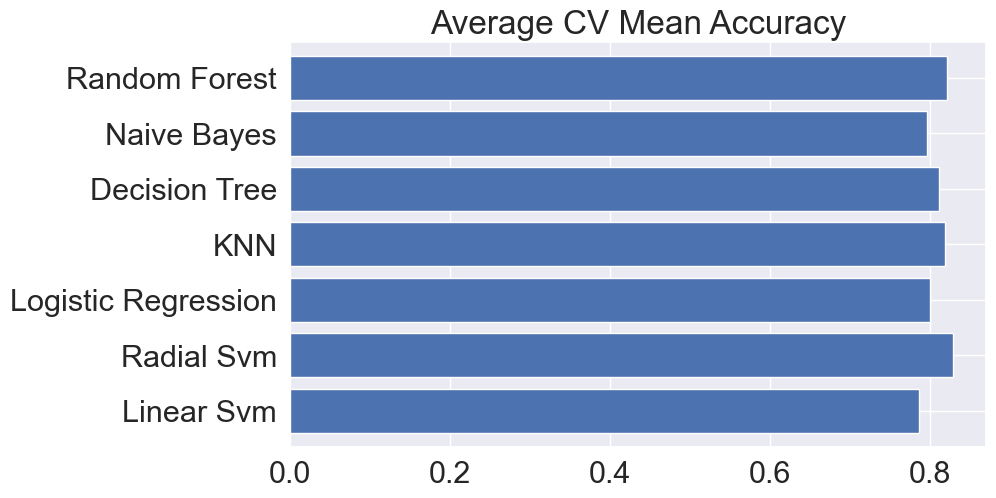

In [90]:
new_models_dataframe2['CV Mean'].plot.barh(width = 0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

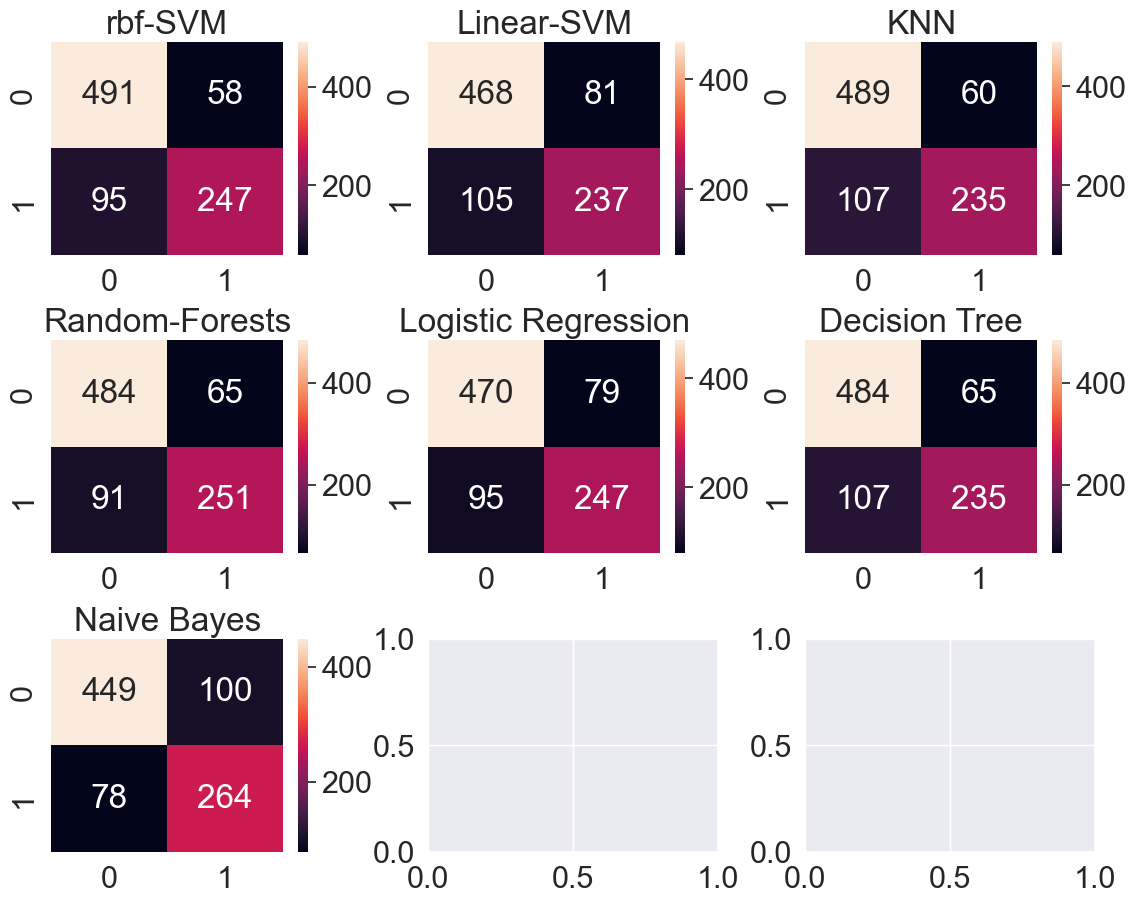

In [91]:
f, ax = plt.subplots(3, 3, figsize=(12, 10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 0], annot=True, fmt='2.0f')
ax[0, 0].set_title('rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 1], annot=True, fmt='2.0f')
ax[0, 1].set_title('Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 2], annot=True, fmt='2.0f')
ax[0, 2].set_title('KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 0], annot=True, fmt='2.0f')
ax[1, 0].set_title('Random-Forests')
y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 1], annot=True, fmt='2.0f')
ax[1, 1].set_title('Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 2], annot=True, fmt='2.0f')
ax[1, 2].set_title('Decision Tree')
y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2, 0], annot=True, fmt='2.0f')
ax[2, 0].set_title('Naive Bayes')
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

In [92]:
from sklearn.metrics import precision_recall_curve, recall_score, f1_score

### SVM

In [93]:
from sklearn.model_selection import GridSearchCV

- Manual tuning
- gridsearch search
- Eandomized search
- Baysian optimzantion

In [94]:
C = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}

gd = GridSearchCV(estimator = svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.6, gamma=0.1)


In [95]:
best_params = gd.best_estimator_.get_params()
best_params

{'C': 0.6,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.1,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Ensembling
- Voting Classifier

- Bagging

- Boosting

### Voting Classifier

In [96]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                                ('RBF',svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
                                                ('RFor',RandomForestClassifier(n_estimators=500, random_state=0)),
                                                ('LR',LogisticRegression(C=0.05)),
                                                ('DT',DecisionTreeClassifier(random_state=0)),
                                                ('NB',GaussianNB()),
                                                ('svm',svm.SVC(kernel='linear', probability=True))
                                               ],
                                   voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv = 10, scoring= 'accuracy')
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8283582089552238
The cross validated score is 0.8226716604244693


### Bagging

In [97]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator= KNeighborsClassifier(n_neighbors=3),
                          random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.8059701492537313
The cross validated score for bagged KNN is: 0.8160424469413232


### Bagged DecisionTree

In [98]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                          random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.7873134328358209
The cross validated score for bagged Decision Tree is: 0.8227715355805243


### Boosting

#### AdaBoost(Adaptive Boosting)

In [99]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


#### XGBoost

In [100]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8204993757802747


#### Confusion Matrix for the Best Model

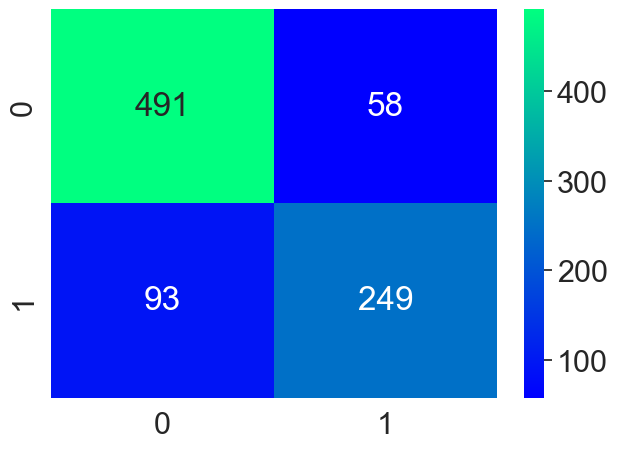

In [101]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

### Feature Importance

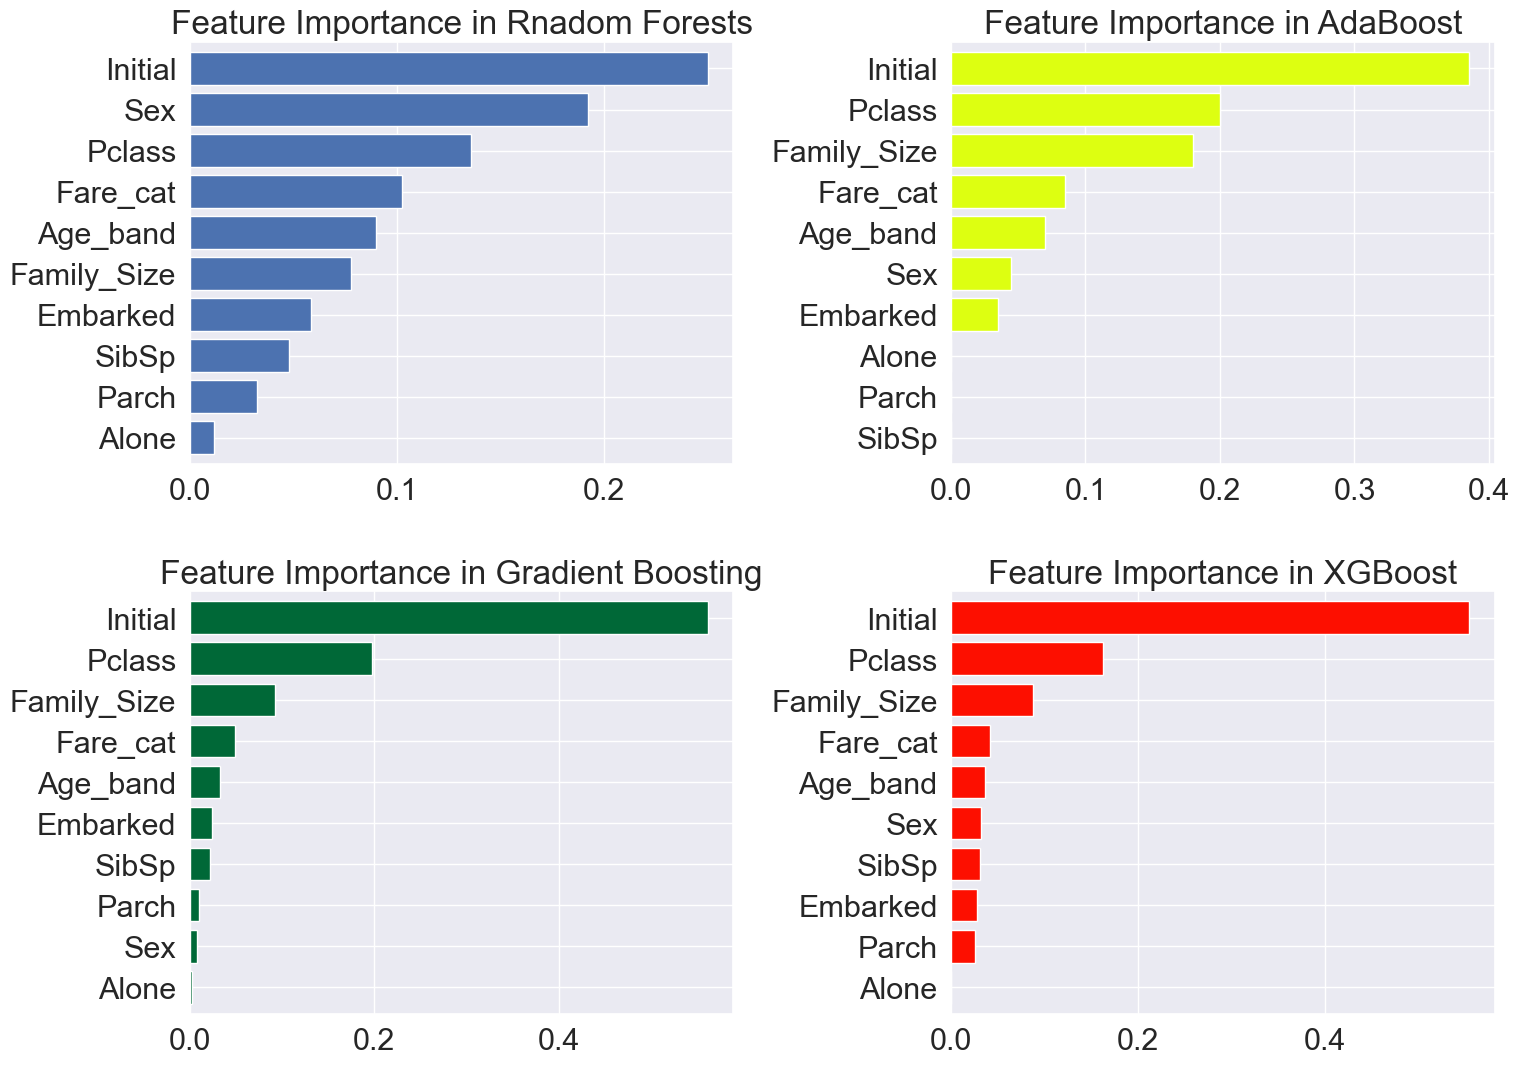

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
f, ax = plt.subplots(2, 2, figsize=(15, 12))
model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 0])
ax[0, 0].set_title('Feature Importance in Rnadom Forests')
model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 1],color='#ddff11')
ax[0, 1].set_title('Feature Importance in AdaBoost')
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 0],cmap='RdYlGn_r')
ax[1, 0].set_title('Feature Importance in Gradient Boosting')
model = XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 1],color='#FD0F00')
ax[1, 1].set_title('Feature Importance in XGBoost')
plt.subplots_adjust(hspace=0.3, wspace=0.4)
plt.show()